# AIR POLLUTION IN INDIA Analysis

# - Jaya Raghavendra | 7036563656 | jay.raghav333@gmail.com

![](Ani02.jpg)

In [1]:
#importing the libraries

from pandas import DataFrame as df
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset
df = pd.read_csv('dataset.csv')

#top 5 rows of the data
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,2/1/1990
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,2/1/1990
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,2/1/1990
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,3/1/1990
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,3/1/1990


In [3]:
#shape of your data
df.shape

(435742, 13)

In [4]:
#basic infromation of your data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
stn_code                       291665 non-null object
sampling_date                  435739 non-null object
state                          435742 non-null object
location                       435739 non-null object
agency                         286261 non-null object
type                           430349 non-null object
so2                            401096 non-null float64
no2                            419509 non-null float64
rspm                           395520 non-null float64
spm                            198355 non-null float64
location_monitoring_station    408251 non-null object
pm2_5                          9314 non-null float64
date                           435735 non-null object
dtypes: float64(5), object(8)
memory usage: 43.2+ MB


# know your Missing data

In [5]:
#missing values column wise
df.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

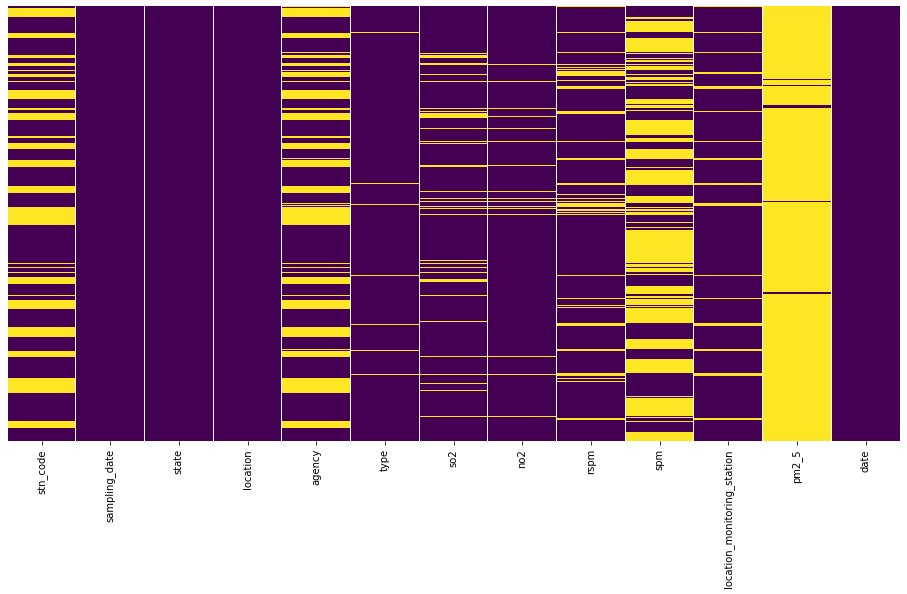

In [6]:
#best way to see your missing data
plt.figure(figsize=(16,8))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
#get the rows which contains missing data
#df[df.isna().any(axis=1)]

######################################################################
************************* Missing percentage *************************
######################################################################
                                 0
pm2_5                        97.86
spm                          54.48
agency                       34.30
stn_code                     33.06
rspm                          9.23
so2                           7.95
location_monitoring_station   6.31
no2                           3.73
type                          1.24
sampling_date                 0.00
state                         0.00
location                      0.00
date                          0.00
######################################################################
-------------------- Bar plot Missing percentage --------------------
######################################################################
AxesSubplot(0.125,0.125;0.775x0.755)


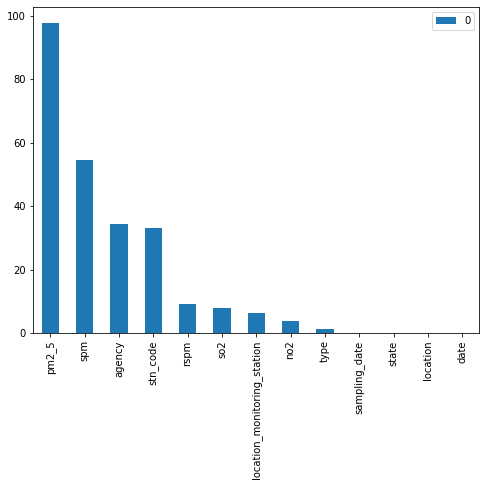

In [8]:
#lets see the missing data by % 
percentage_of_null = pd.DataFrame(df.isnull().mean().round(4)*100).sort_values(by=0,ascending=False)

print("#"*70)
print("*"*25,"Missing percentage","*"*25)
print("#"*70)
print(percentage_of_null)

print("#"*70)
print("-"*20,"Bar plot Missing percentage","-"*20)
print("#"*70)

print(percentage_of_null.plot.bar(figsize=(8,6)))

so from bar plot we have can observe that
* pm2_5, spm, agency, stn_code has highest missing values     ordinally
Here i'm not going to delete pm2_5 and spm because this data crucial for our analysis

##############################################################################################################################
* 'stn_code', 'sampling_date', 'agency',  'location_monitoring_station' nothing to do for our analysis and sample_date has same info in date so we drop with above columns i have mentioned 


In [9]:
# imputing with mean becaouse these columns has less missing values
# and yes we have a option to drop these missing values but I want utilize all the info for analysis

df['so2'].fillna(df.so2.mean() ,inplace=True) 
df['no2'].fillna(df.no2.mean(),inplace=True)  
df['rspm'].fillna(df.rspm.mean(),inplace=True)

df['spm'].fillna(0,inplace=True)   #spm contains 54% of missing data           
df['pm2_5'].fillna(0,inplace=True) #pm2_5 contains 97% of missing data

In [10]:
df.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                                 0
no2                                 0
rspm                                0
spm                                 0
location_monitoring_station     27491
pm2_5                               0
date                                7
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
stn_code                       291665 non-null object
sampling_date                  435739 non-null object
state                          435742 non-null object
location                       435739 non-null object
agency                         286261 non-null object
type                           430349 non-null object
so2                            435742 non-null float64
no2                            435742 non-null float64
rspm                           435742 non-null float64
spm                            435742 non-null float64
location_monitoring_station    408251 non-null object
pm2_5                          435742 non-null float64
date                           435735 non-null object
dtypes: float64(5), object(8)
memory usage: 43.2+ MB


In [12]:
df.keys()

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

In [13]:
#dropping the unneeded columns
col=['stn_code', 'sampling_date', 'agency', 'location_monitoring_station']

df.drop(columns=col,axis=1,inplace=True)

In [14]:
#after deletion of columns
df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,108.832784,0.0,0.0,2/1/1990
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,108.832784,0.0,0.0,2/1/1990
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,108.832784,0.0,0.0,2/1/1990
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,108.832784,0.0,0.0,3/1/1990
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,108.832784,0.0,0.0,3/1/1990


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 9 columns):
state       435742 non-null object
location    435739 non-null object
type        430349 non-null object
so2         435742 non-null float64
no2         435742 non-null float64
rspm        435742 non-null float64
spm         435742 non-null float64
pm2_5       435742 non-null float64
date        435735 non-null object
dtypes: float64(5), object(4)
memory usage: 29.9+ MB


In [17]:
#changing into timestamp for further analysis
df.date = pd.to_datetime(df.date)

In [18]:
type(df.date.iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [19]:
time = df.date.iloc[0]
time

Timestamp('1990-02-01 00:00:00')

In [20]:
time.month

2

In [21]:
df['Year'] = df.date.apply(lambda time: time.year)
df['Month'] = df.date.apply(lambda time: time.month)

In [22]:
df['Dayofweek'] = df.date.apply(lambda time: time.dayofweek)

In [23]:
df.drop('date',axis=1,inplace=True)

In [24]:
df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,Year,Month,Dayofweek
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,108.832784,0.0,0.0,1990.0,2.0,3.0
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,108.832784,0.0,0.0,1990.0,2.0,3.0
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,108.832784,0.0,0.0,1990.0,2.0,3.0
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,108.832784,0.0,0.0,1990.0,3.0,3.0
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,108.832784,0.0,0.0,1990.0,3.0,3.0


In [25]:
dmap ={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [26]:
df['Dayofweek'] = df.Dayofweek.map(dmap)

In [27]:
df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,Year,Month,Dayofweek
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,108.832784,0.0,0.0,1990.0,2.0,Thu
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,108.832784,0.0,0.0,1990.0,2.0,Thu
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,108.832784,0.0,0.0,1990.0,2.0,Thu
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,108.832784,0.0,0.0,1990.0,3.0,Thu
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,108.832784,0.0,0.0,1990.0,3.0,Thu


In [28]:
df.state.value_counts().sort_index()

Andhra Pradesh                 26368
Arunachal Pradesh                 90
Assam                          19361
Bihar                           2275
Chandigarh                      8520
Chhattisgarh                    7831
Dadra & Nagar Haveli             634
Daman & Diu                      782
Delhi                           8551
Goa                             6206
Gujarat                        21279
Haryana                         3420
Himachal Pradesh               22896
Jammu & Kashmir                 1289
Jharkhand                       5968
Karnataka                      17119
Kerala                         24728
Lakshadweep                        1
Madhya Pradesh                 19920
Maharashtra                    60384
Manipur                           76
Meghalaya                       3853
Mizoram                         5338
Nagaland                        2463
Odisha                         19279
Puducherry                      3785
Punjab                         25634
R

In [29]:
#from the above info we have Uttaranchal andUttarakhand both same states names but older and new so
#we can use replace for solving this issue
replacement = {'state': {'Uttaranchal': 'Uttarakhand'}}
df.replace(replacement, regex = True, inplace = True)

In [30]:
df.state.value_counts().sort_index()

Andhra Pradesh                 26368
Arunachal Pradesh                 90
Assam                          19361
Bihar                           2275
Chandigarh                      8520
Chhattisgarh                    7831
Dadra & Nagar Haveli             634
Daman & Diu                      782
Delhi                           8551
Goa                             6206
Gujarat                        21279
Haryana                         3420
Himachal Pradesh               22896
Jammu & Kashmir                 1289
Jharkhand                       5968
Karnataka                      17119
Kerala                         24728
Lakshadweep                        1
Madhya Pradesh                 19920
Maharashtra                    60384
Manipur                           76
Meghalaya                       3853
Mizoram                         5338
Nagaland                        2463
Odisha                         19279
Puducherry                      3785
Punjab                         25634
R

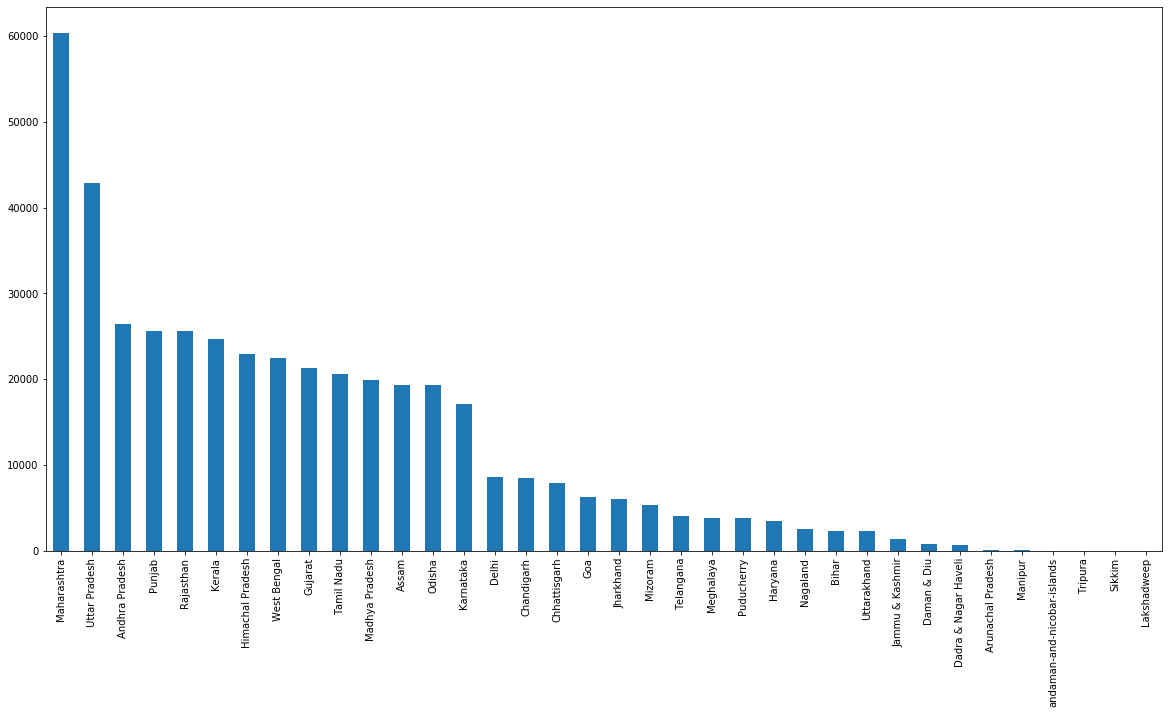

In [34]:
#state wise contribution
df.state.value_counts().plot.bar(figsize=(20,10))

In [31]:
df.type.value_counts()

Residential, Rural and other Areas    179014
Industrial Area                        96091
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8980
Sensitive Areas                         5536
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: type, dtype: int64

from above data we have repeated kind of data like 

'Residential, Rural and other Areas, Residential and others and Residential'

'Sensitive Areas, Sensitive Area, Sensitive'

'RIRUO, others'

In [35]:
remap = { 'Residential, Rural and other Areas': 'Residential', 'Residential and others':'Residential',
                             'Sensitive Areas': 'Sensitive',           'Sensitive Area':'Sensitive',
                            'Industrial Areas': 'Industrial',         'Industrial Area':'Industrial', 
                                       'RIRUO': 'others'}

In [36]:
replacements = {'type': remap }
df.replace(replacements, regex = True, inplace = True)

In [37]:
#after mapping with dictionary 
df.type.value_counts()

Residential    265963
Industrial     148071
Sensitive       15011
others           1304
Name: type, dtype: int64

In [38]:
df.keys()

Index(['state', 'location', 'type', 'so2', 'no2', 'rspm', 'spm', 'pm2_5',
       'Year', 'Month', 'Dayofweek'],
      dtype='object')

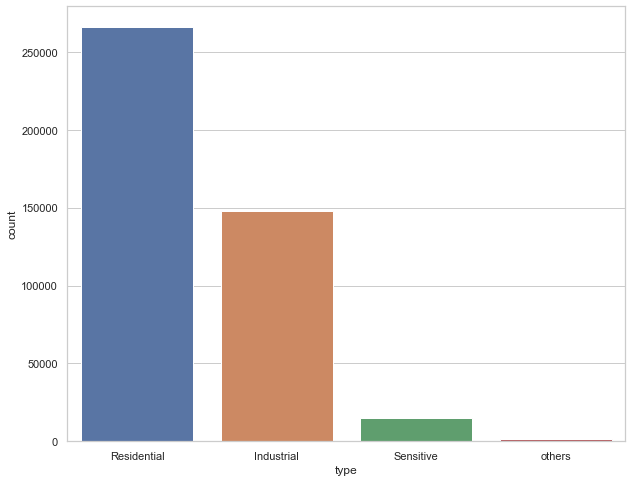

In [39]:
#lets see the type column info 

plt.figure(figsize=(10,8))

sns.set(style="whitegrid")

sns.countplot(x='type',data=df)

by above info most pollution emits from
Residential followed by Industrial , Sensitive and others

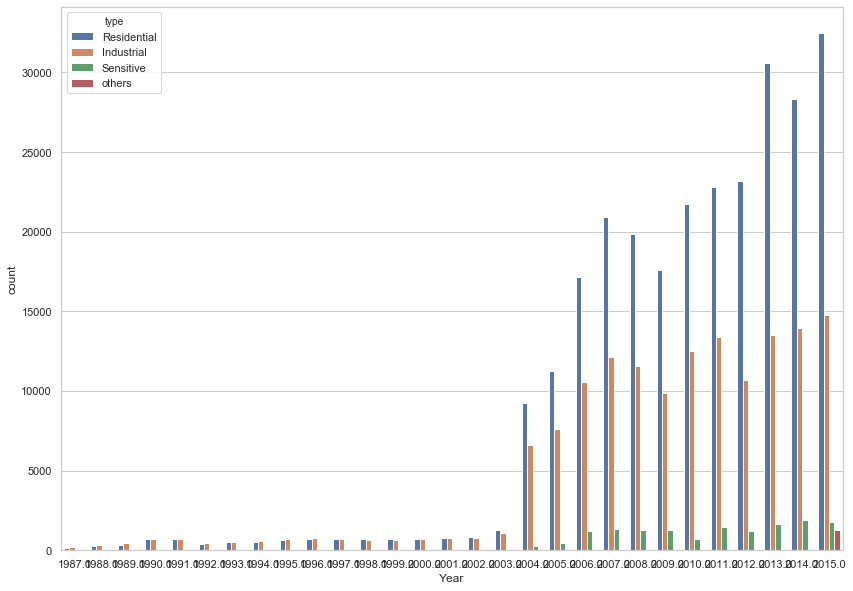

In [40]:
#plot for year wise type contributions 

plt.figure(figsize=(14,10))
sns.countplot(x='Year',data=df,hue='type')

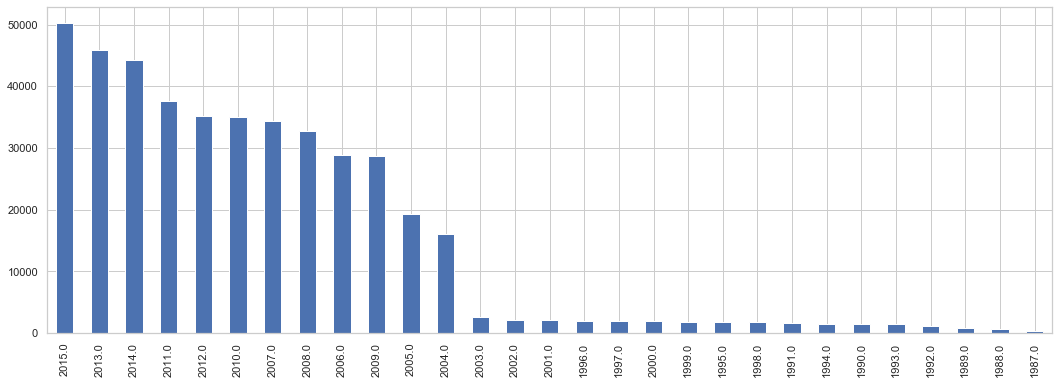

In [41]:
df.Year.value_counts().plot.bar(figsize=(18,6))

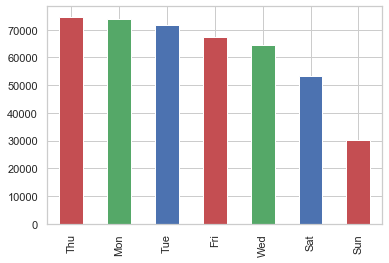

In [42]:
#day wise info
df.Dayofweek.value_counts().plot.bar(color=['r','g','b'])

so from our data most pollutions recorded in Thursday, Monday, Tuesday and follows as above

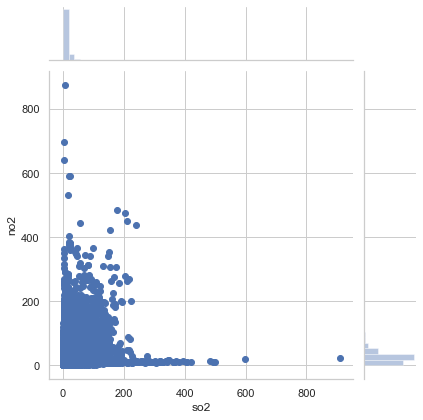

In [43]:
#lets see the relation between so2 and no2

#sns.lmplot(x='so2',y='no2',data=df[['so2','no2']].reset_index())

sns.jointplot(x='so2', y='no2', data=df[['so2','no2']].reset_index())

In [44]:
df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,Year,Month,Dayofweek
0,Andhra Pradesh,Hyderabad,Residential,4.8,17.4,108.832784,0.0,0.0,1990.0,2.0,Thu
1,Andhra Pradesh,Hyderabad,Industrial,3.1,7.0,108.832784,0.0,0.0,1990.0,2.0,Thu
2,Andhra Pradesh,Hyderabad,Residential,6.2,28.5,108.832784,0.0,0.0,1990.0,2.0,Thu
3,Andhra Pradesh,Hyderabad,Residential,6.3,14.7,108.832784,0.0,0.0,1990.0,3.0,Thu
4,Andhra Pradesh,Hyderabad,Industrial,4.7,7.5,108.832784,0.0,0.0,1990.0,3.0,Thu


from above plot we can observe a strong relation b/w all variables with respect to so2 and no2

In [45]:
df.keys()

Index(['state', 'location', 'type', 'so2', 'no2', 'rspm', 'spm', 'pm2_5',
       'Year', 'Month', 'Dayofweek'],
      dtype='object')

In [46]:
df.iloc[:,3:9]

,so2,no2,rspm,spm,pm2_5,Year
0,4.800000,17.400000,108.832784,0.0,0.0,1990.0
1,3.100000,7.000000,108.832784,0.0,0.0,1990.0
2,6.200000,28.500000,108.832784,0.0,0.0,1990.0
3,6.300000,14.700000,108.832784,0.0,0.0,1990.0
4,4.700000,7.500000,108.832784,0.0,0.0,1990.0
...,...,...,...,...,...,...
435737,22.000000,50.000000,143.000000,0.0,0.0,2015.0
435738,20.000000,46.000000,171.000000,0.0,0.0,2015.0
435739,10.829414,25.809623,108.832784,0.0,0.0,NaN
435740,10.829414,25.809623,108.832784,0.0,0.0,NaN


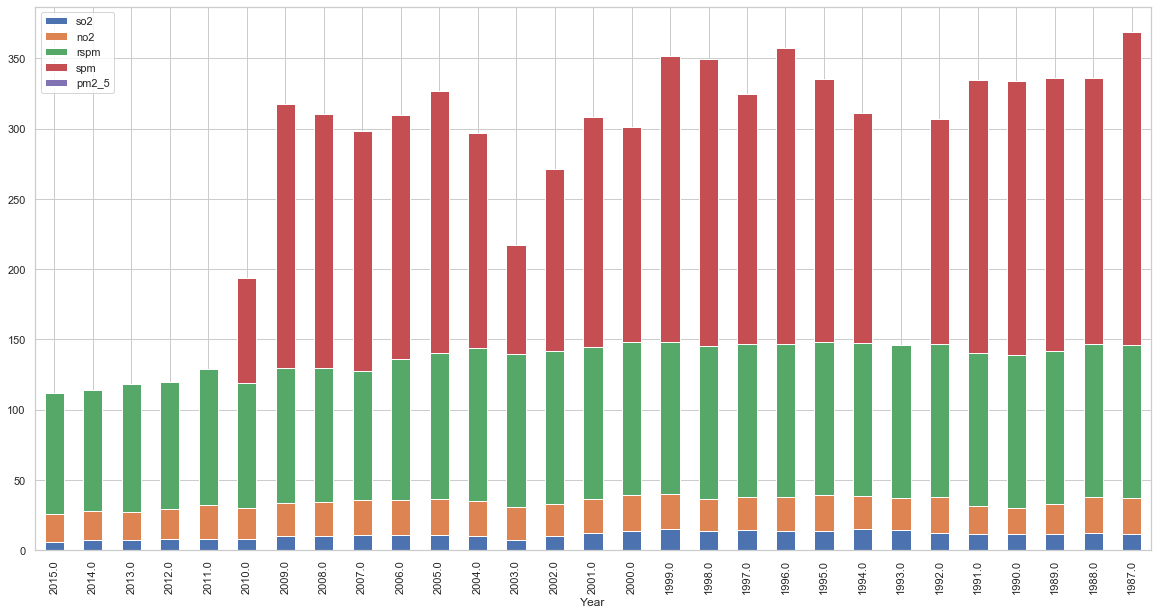

In [47]:
#year wise polluted gases contributions
(df.iloc[:,3:9]).groupby(["Year"]).median().sort_values("Year", ascending = False).plot.bar(stacked=True,figsize=(20,10))

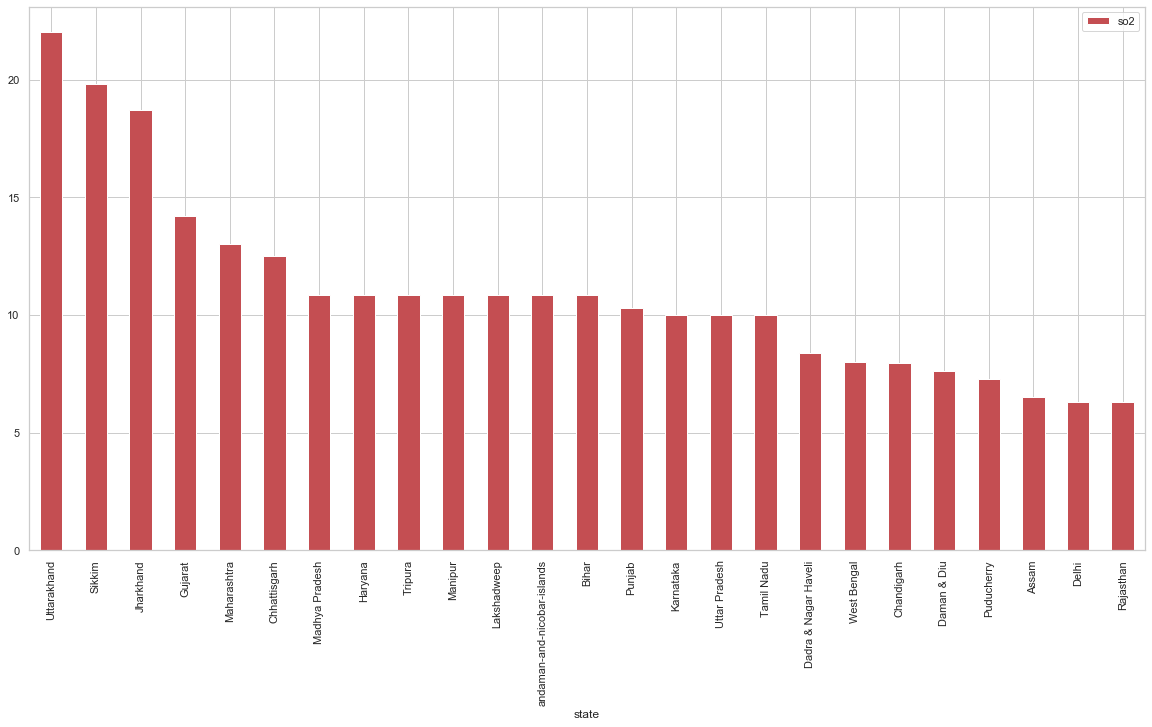

In [48]:
#bar plot of 25 most effected states with  so2 

df[['state','so2']].groupby(['state']).median().sort_values('so2', ascending = False).head(25).plot.bar(figsize=(20,10),color='r')

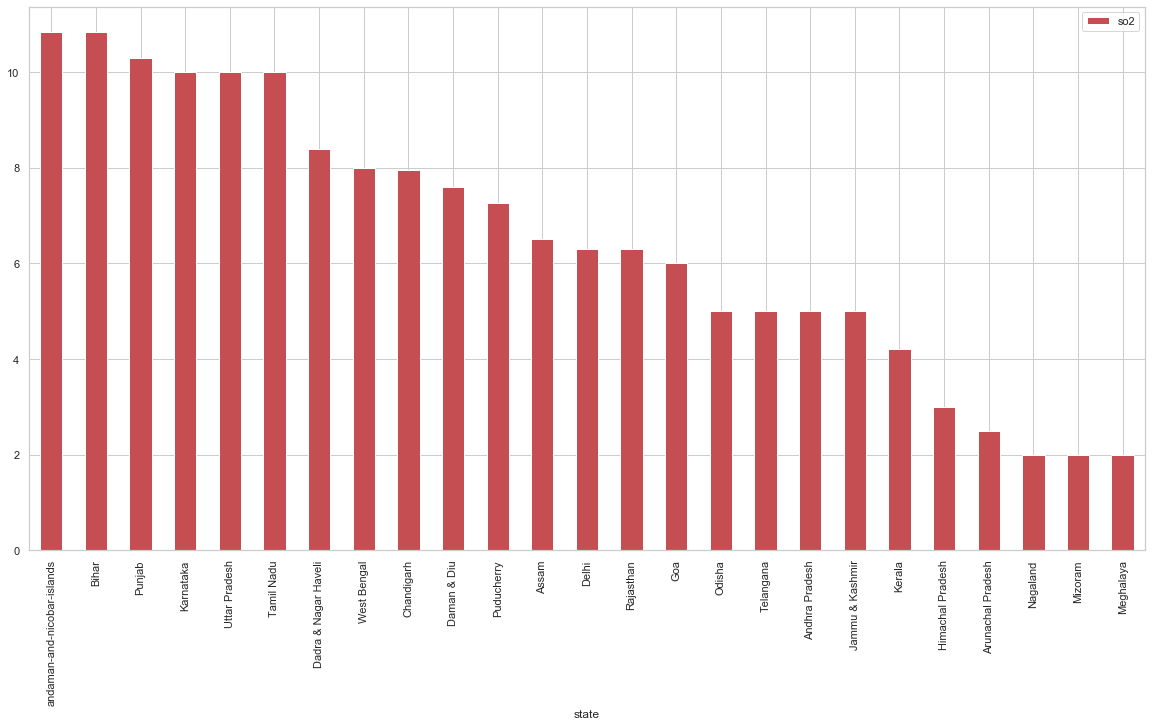

In [88]:
#bar plot of 25 least effected states with so2 

df[['state','so2']].groupby(['state']).median().sort_values('so2', ascending = False).tail(25).plot.bar(figsize=(20,10),color='r')

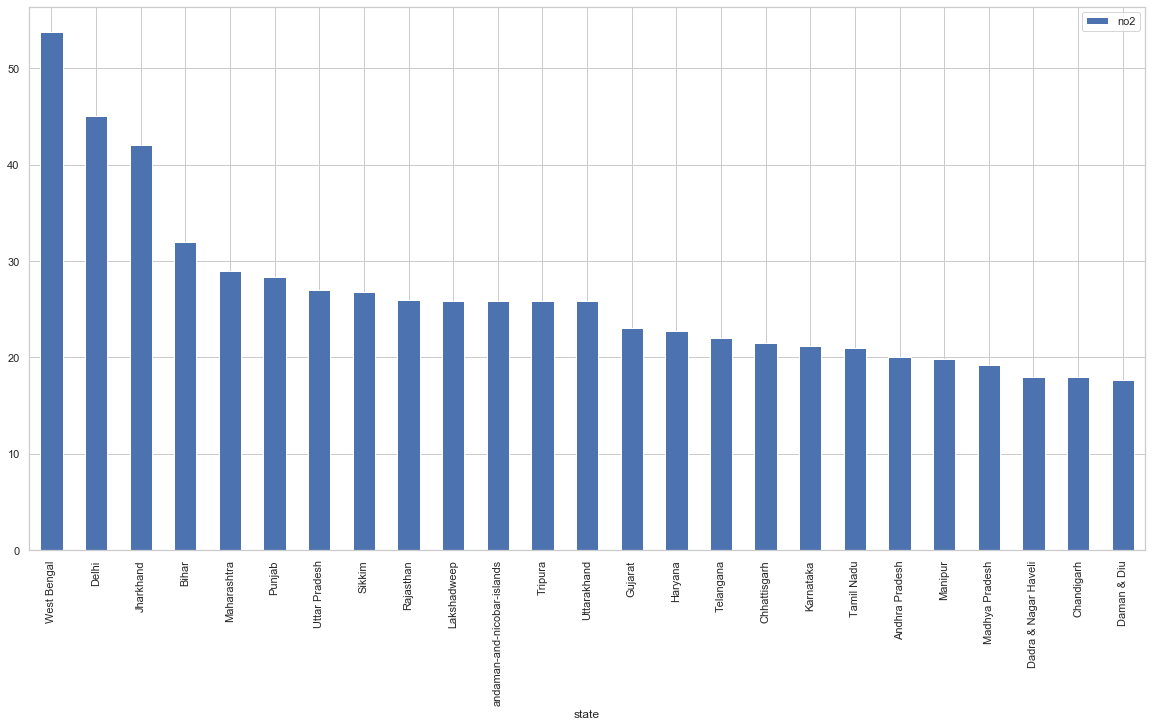

In [50]:
#bar plot of 25 most effected states with  no2 

df[['state','no2']].groupby(['state']).median().sort_values('no2', ascending = False).head(25).plot.bar(figsize=(20,10))

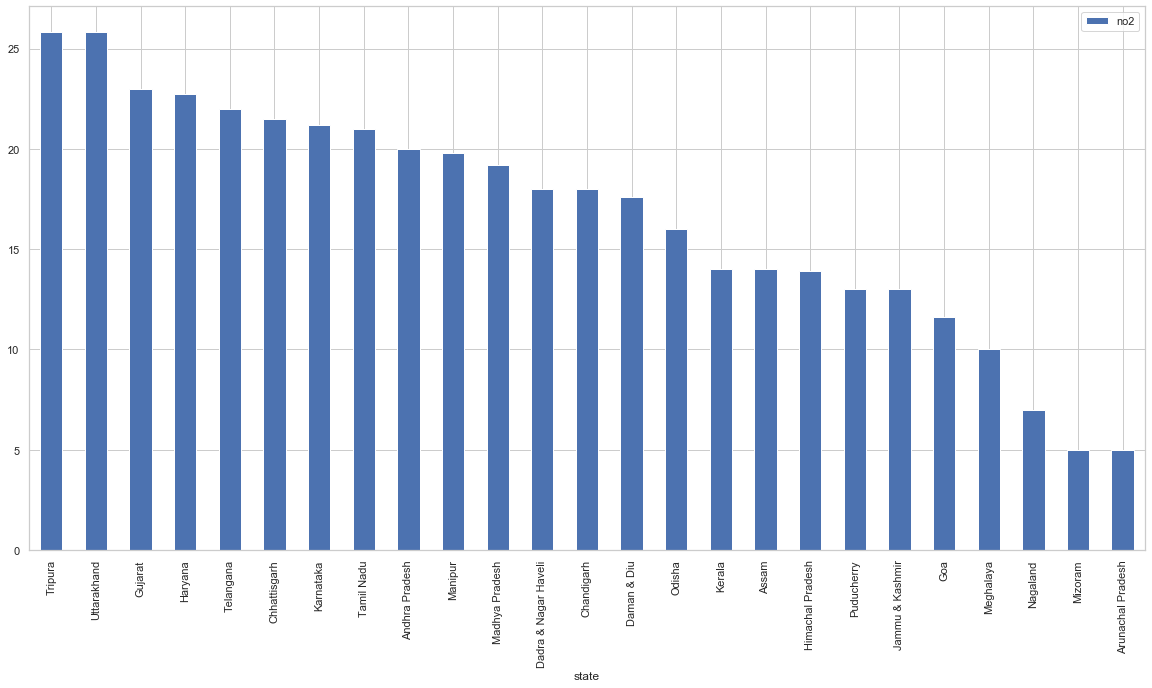

In [51]:
#bar plot of 25 least effected states with  no2 

df[['state','no2']].groupby(['state']).median().sort_values('no2', ascending = False).tail(25).plot.bar(figsize=(20,10),color='b')

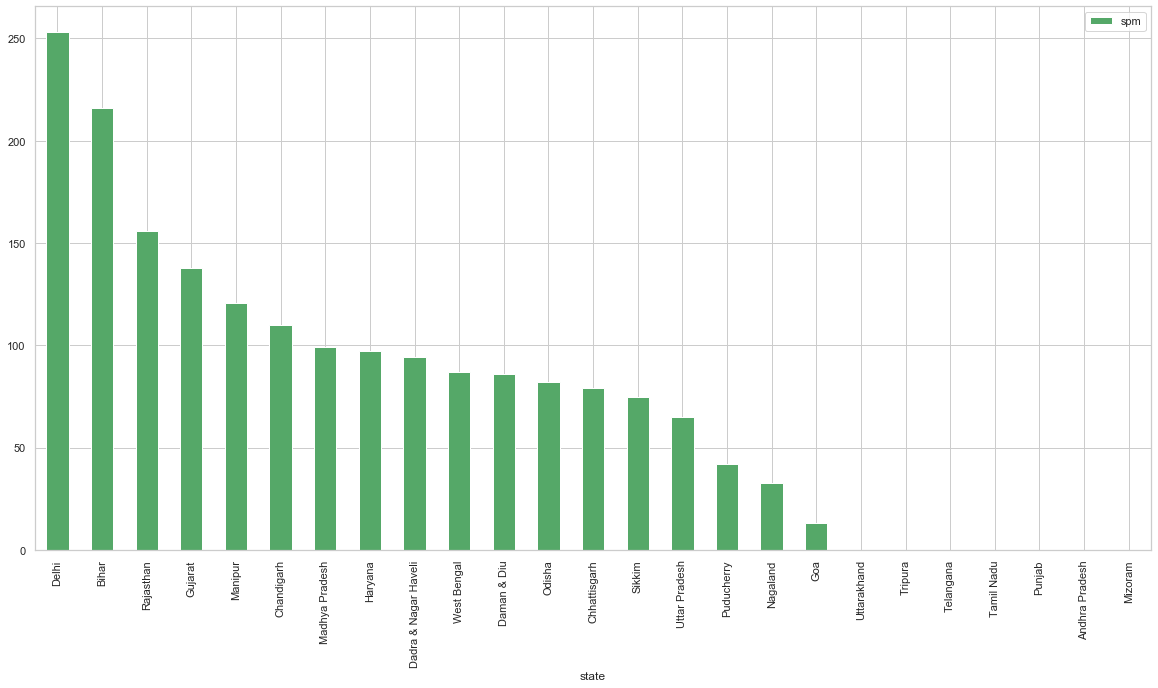

In [52]:
#bar plot of 25 most effected states with  spm 

df[['state','spm']].groupby(['state']).median().sort_values('spm', ascending = False).head(25).plot.bar(figsize=(20,10),color='g')

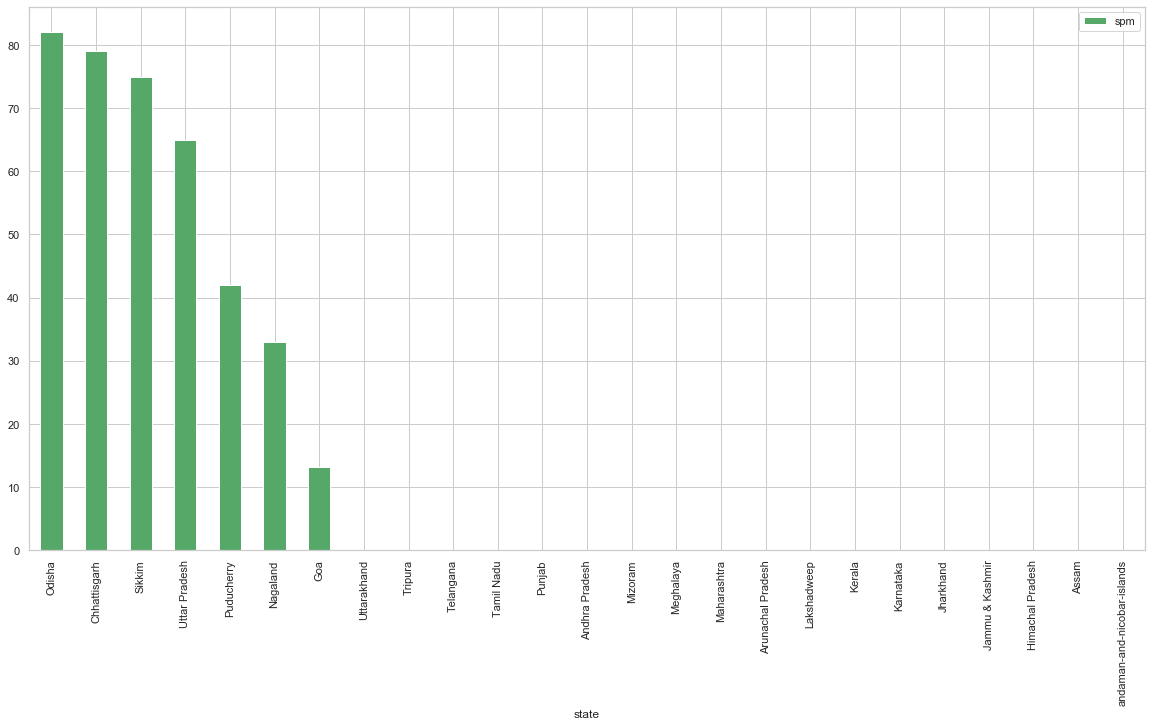

In [53]:
#bar least of 25 most effected states with spm 
  
df[['state','spm']].groupby(['state']).median().sort_values('spm', ascending = False).tail(25).plot.bar(figsize=(20,10),color='g')

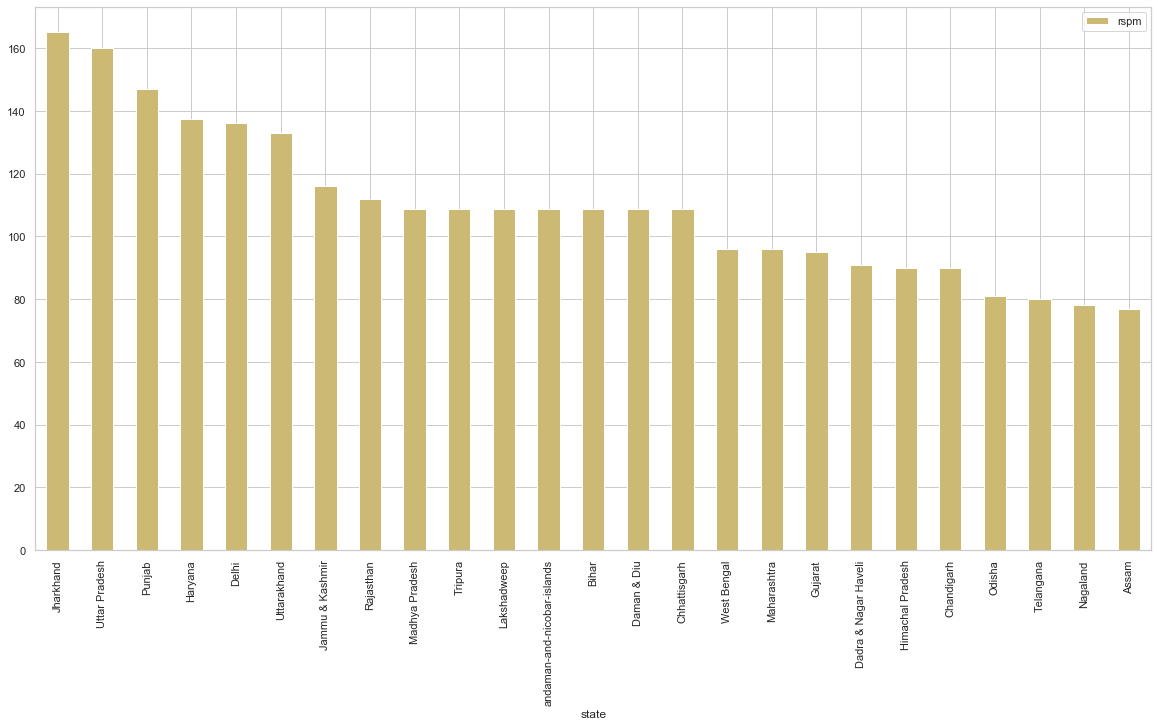

In [54]:
#bar plot of 25 most effected states with  rspm 

df[['state','rspm']].groupby(['state']).median().sort_values('rspm', ascending = False).head(25).plot.bar(figsize=(20,10),color='y')

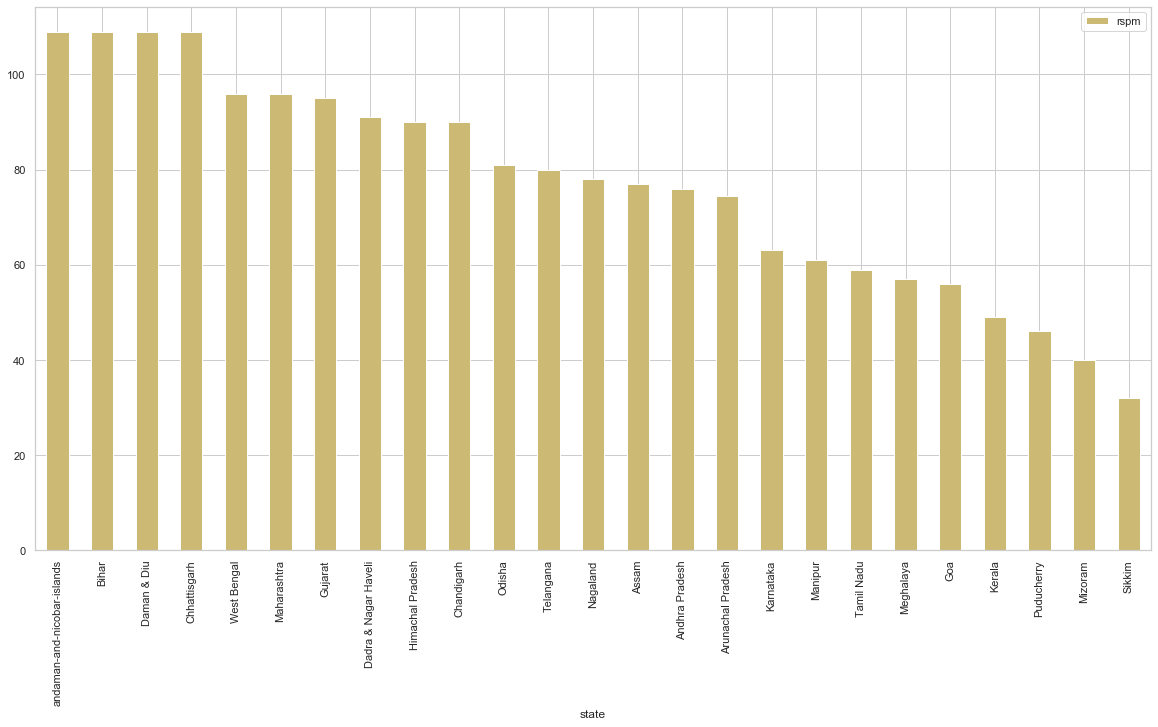

In [55]:
#bar plot of 25 least effected states with  rspm 

df[['state','rspm']].groupby(['state']).median().sort_values('rspm', ascending = False).tail(25).plot.bar(figsize=(20,10),color='y')

In [56]:
#because we imputed zero so that we start our analysis with without zero values

pm2_5_df = df[df.pm2_5 > 0]

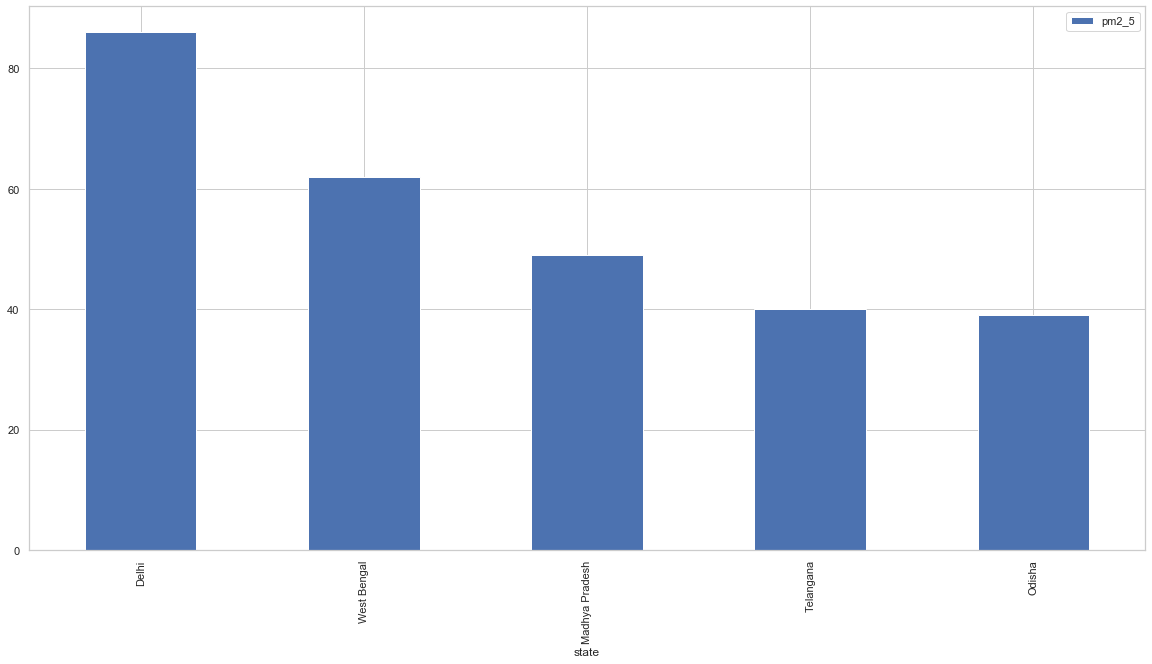

In [57]:
#bar plot of most effected states with  pm2.5 

pm2_5_df[['state','pm2_5']].groupby(['state']).median().sort_values('pm2_5', ascending = False).head(5).plot.bar(figsize=(20,10),color='b')

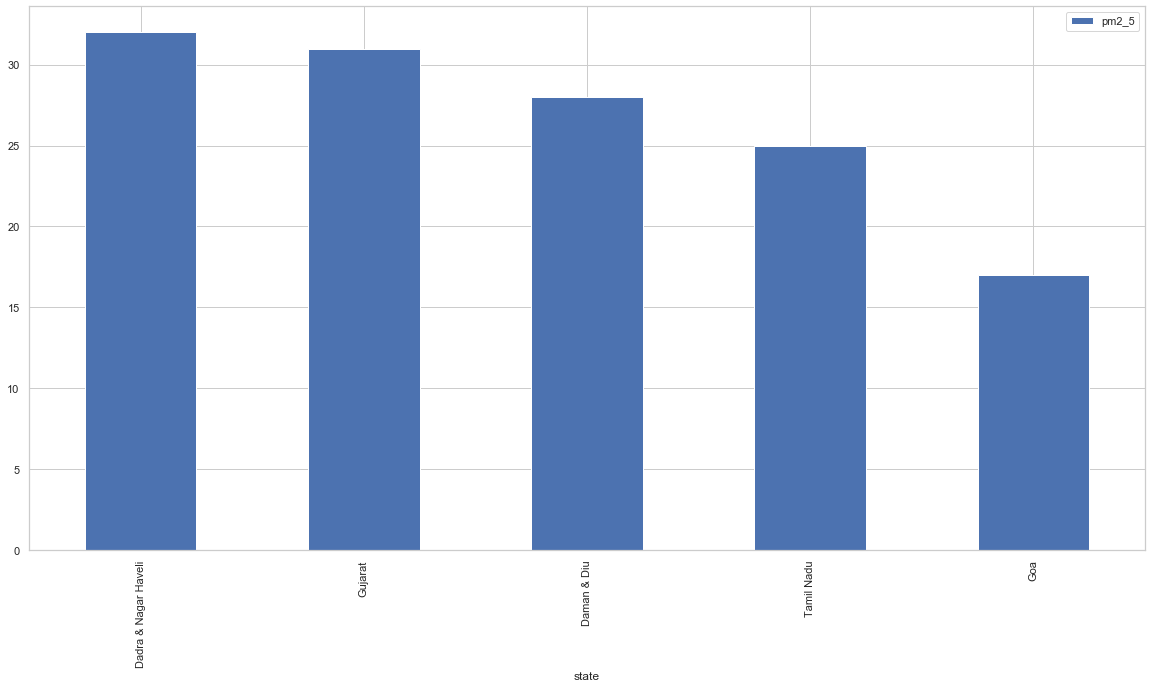

In [58]:
#bar plot of least effected states with  pm2.5 

pm2_5_df[['state','pm2_5']].groupby(['state']).median().sort_values('pm2_5', ascending = False).tail(5).plot.bar(figsize=(20,10),color='b')

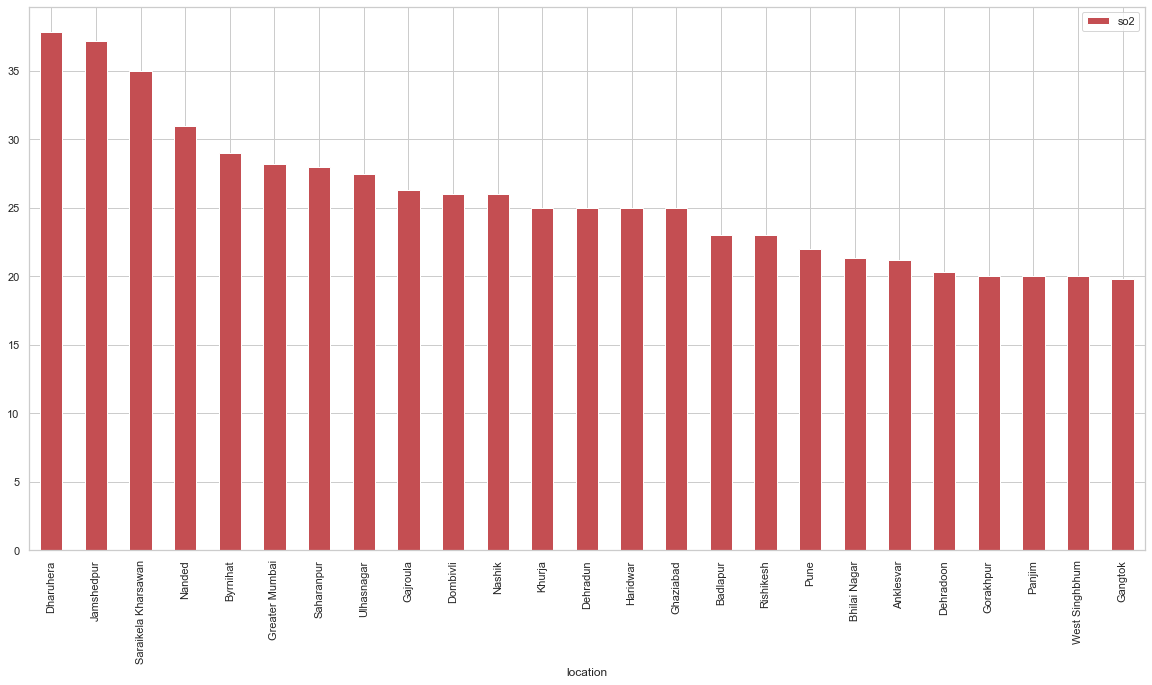

In [59]:
#bar plot of 25 most effected locations with  so2 

df[['location','so2']].groupby(['location']).median().sort_values('so2', ascending = False).head(25).plot.bar(figsize=(20,10),color='r')

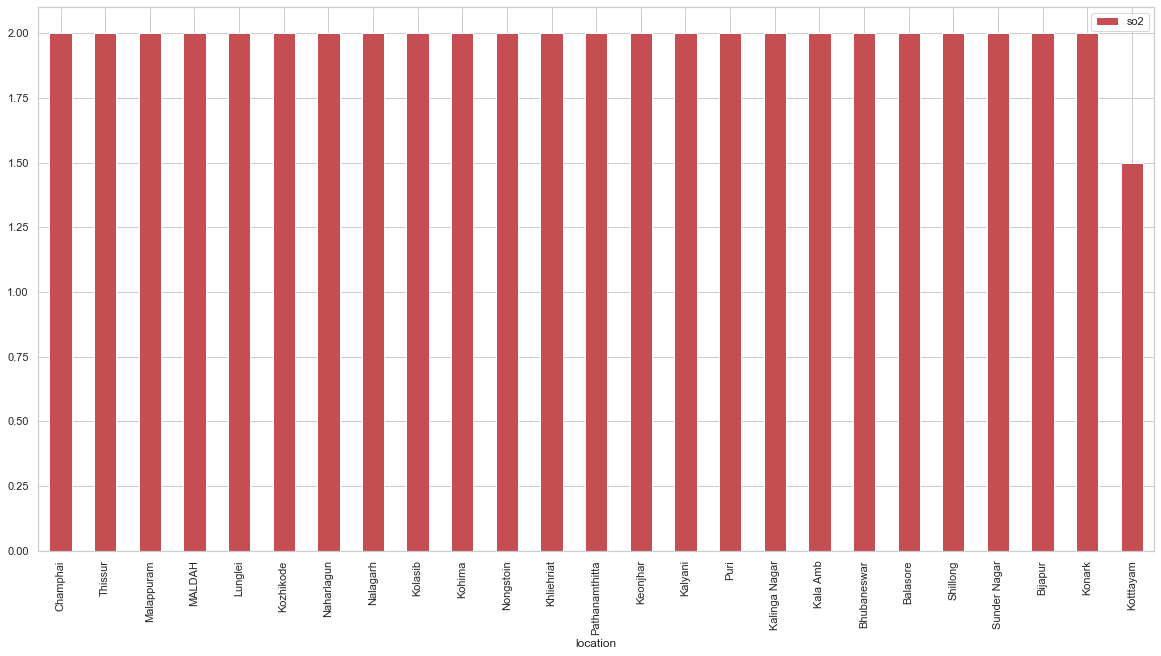

In [60]:
#bar plot of 25 least effected locations with  so2 

df[['location','so2']].groupby(['location']).median().sort_values('so2', ascending = False).tail(25).plot.bar(figsize=(20,10),color='r')

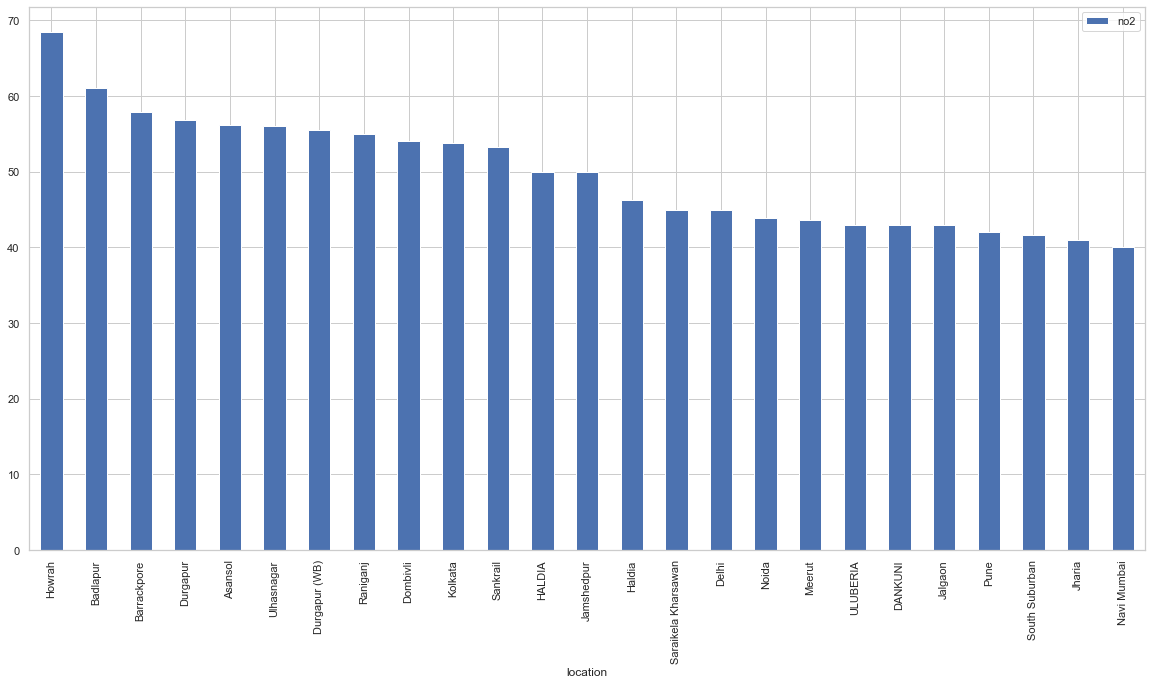

In [61]:
#bar plot of 25 most effected locations with  no2 

df[['location','no2']].groupby(['location']).median().sort_values('no2', ascending = False).head(25).plot.bar(figsize=(20,10),color='b')

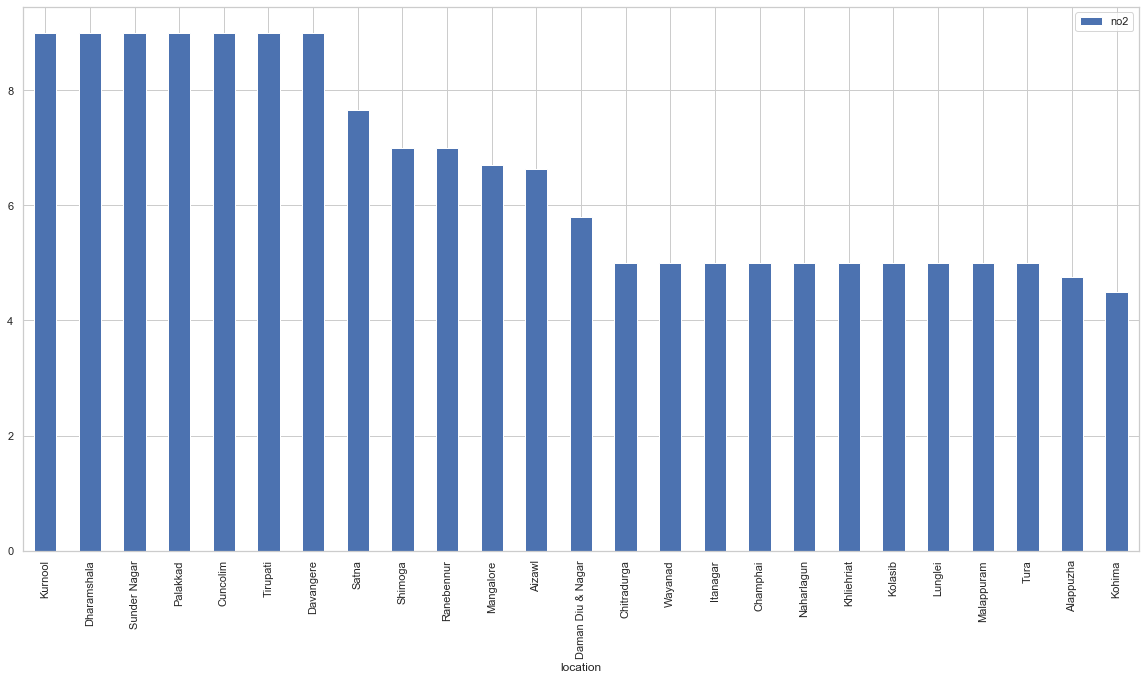

In [62]:
#bar plot of 25 least effected locations with  no2 

df[['location','no2']].groupby(['location']).median().sort_values('no2', ascending = False).tail(25).plot.bar(figsize=(20,10),color='b')

In [63]:
#because we imputed zero so that we start our analysis with without zero values
spm_df = df[df.spm > 0]

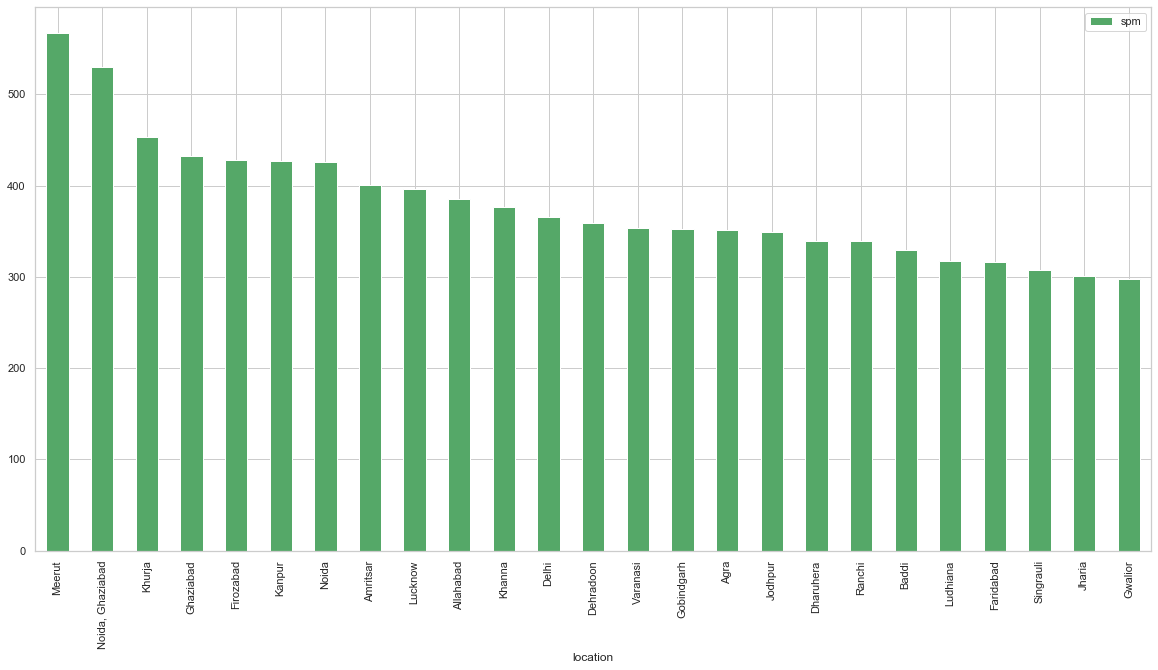

In [64]:
#bar plot of 25 most effected locations with spm 

spm_df[['location','spm']].groupby(['location']).median().sort_values('spm', ascending = False).head(25).plot.bar(figsize=(20,10),color='g')

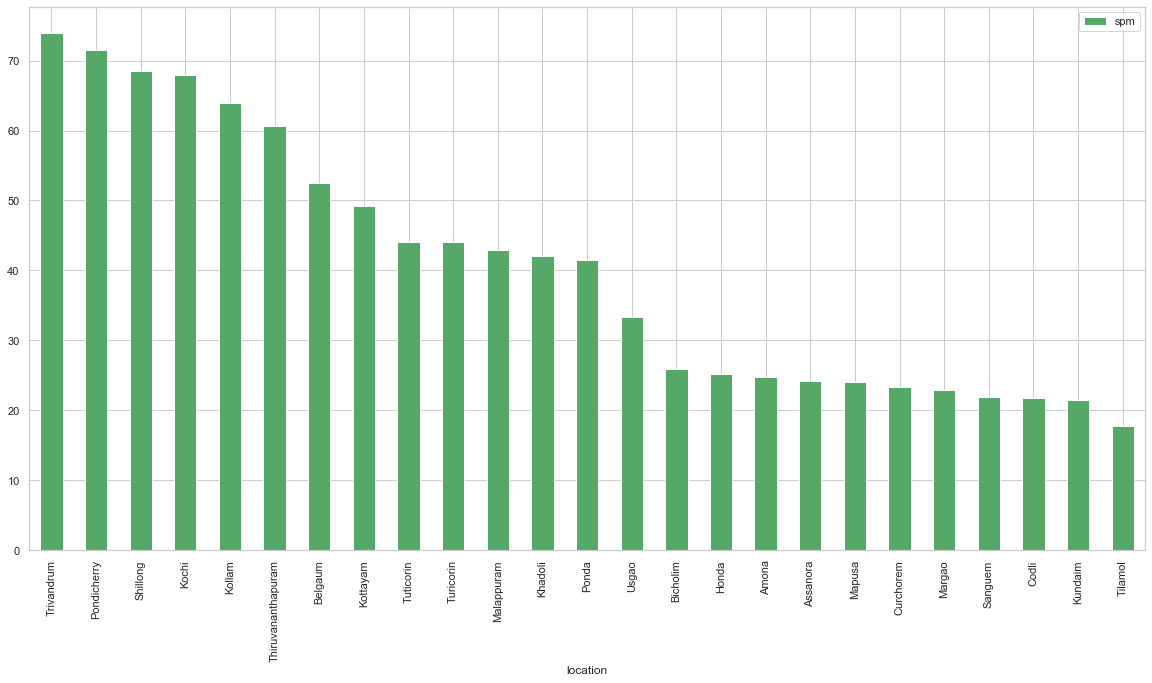

In [65]:
#bar plot of 25 least effected locations with spm 

spm_df[['location','spm']].groupby(['location']).median().sort_values('spm', ascending = False).tail(25).plot.bar(figsize=(20,10),color='g')

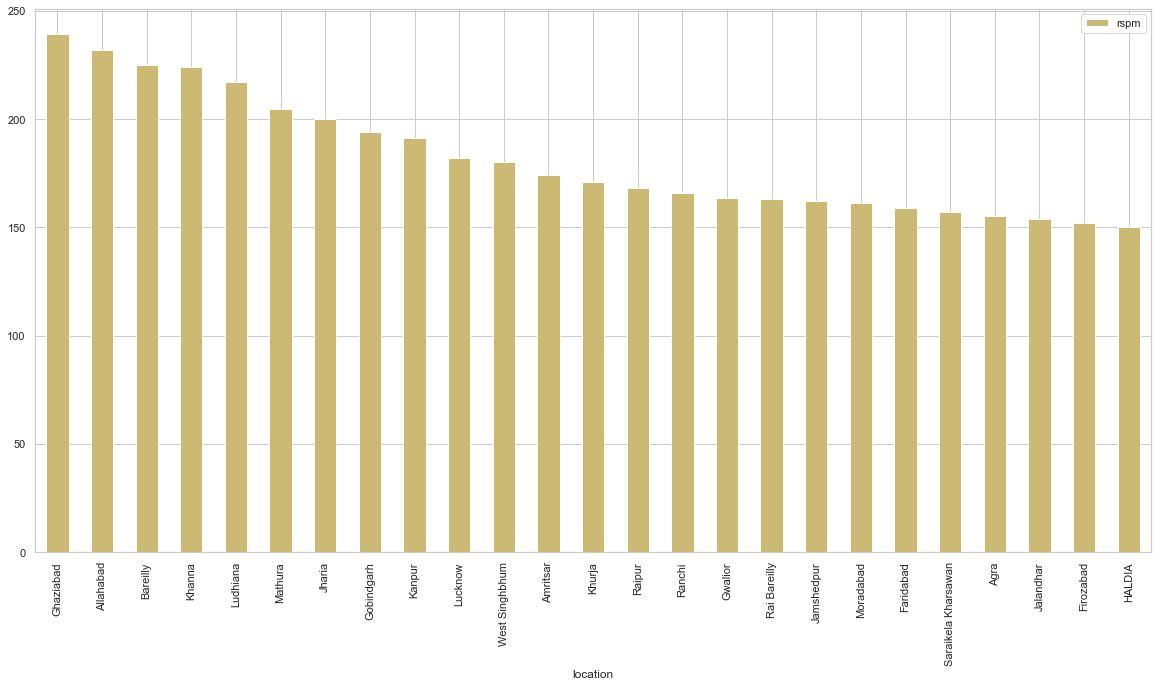

In [66]:
#bar plot of 25 most effected locations with rspm 

df[['location','rspm']].groupby(['location']).median().sort_values('rspm', ascending = False).head(25).plot.bar(figsize=(20,10),color='y')

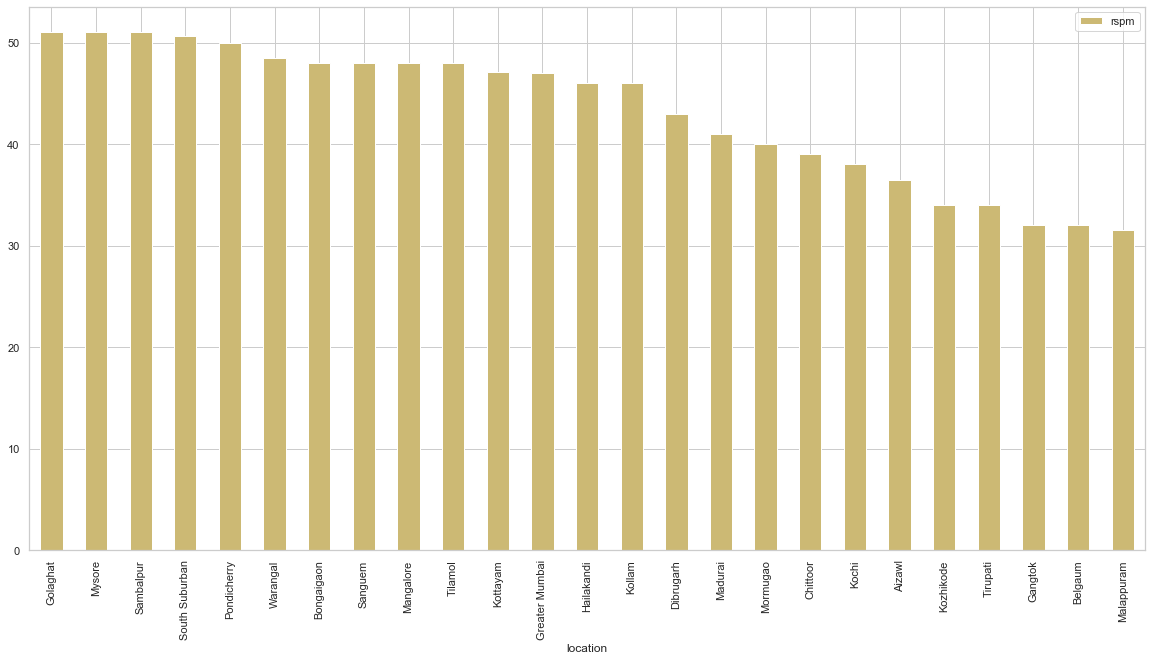

In [67]:
#bar plot of 25 least effected locations with rspm 

spm_df[['location','rspm']].groupby(['location']).median().sort_values('rspm', ascending = False).tail(25).plot.bar(figsize=(20,10),color='y')

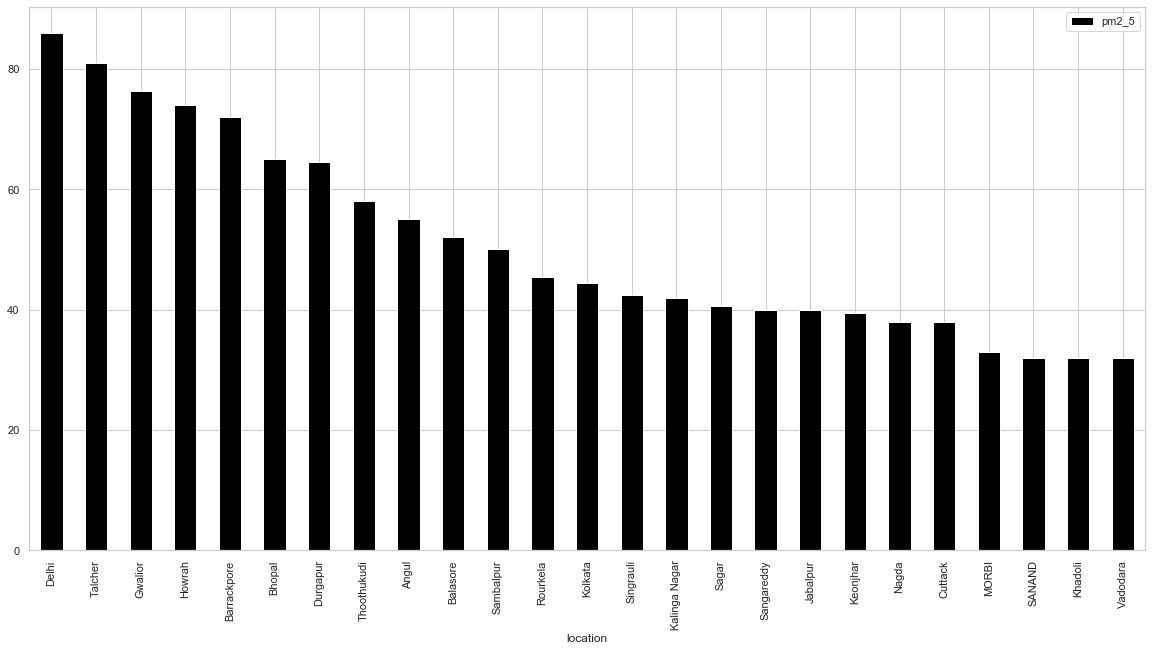

In [68]:
#bar plot of 25 most effected locations with pm2_5 
#pm2_5_df is for without imputed values

pm2_5_df[['location','pm2_5']].groupby(['location']).median().sort_values('pm2_5', ascending = False).head(25).plot.bar(figsize=(20,10),color='black')

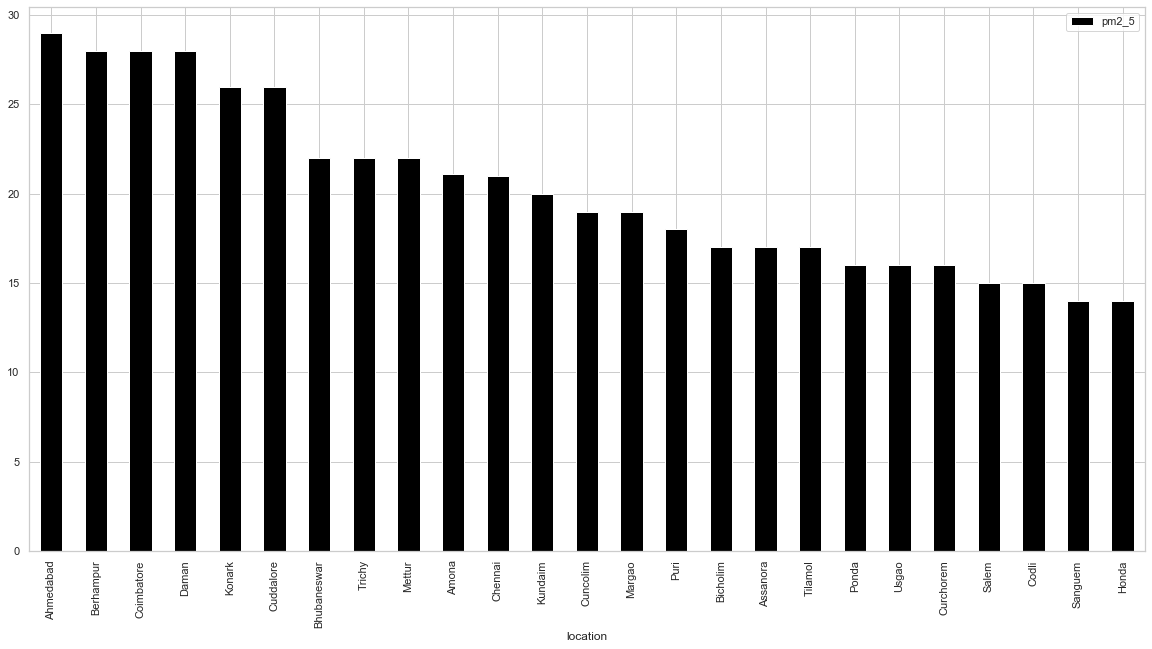

In [69]:
#bar plot of 25 least effected locations with pm2_5 

pm2_5_df[['location','pm2_5']].groupby(['location']).median().sort_values('pm2_5', ascending = False).tail(25).plot.bar(figsize=(20,10),color='black')

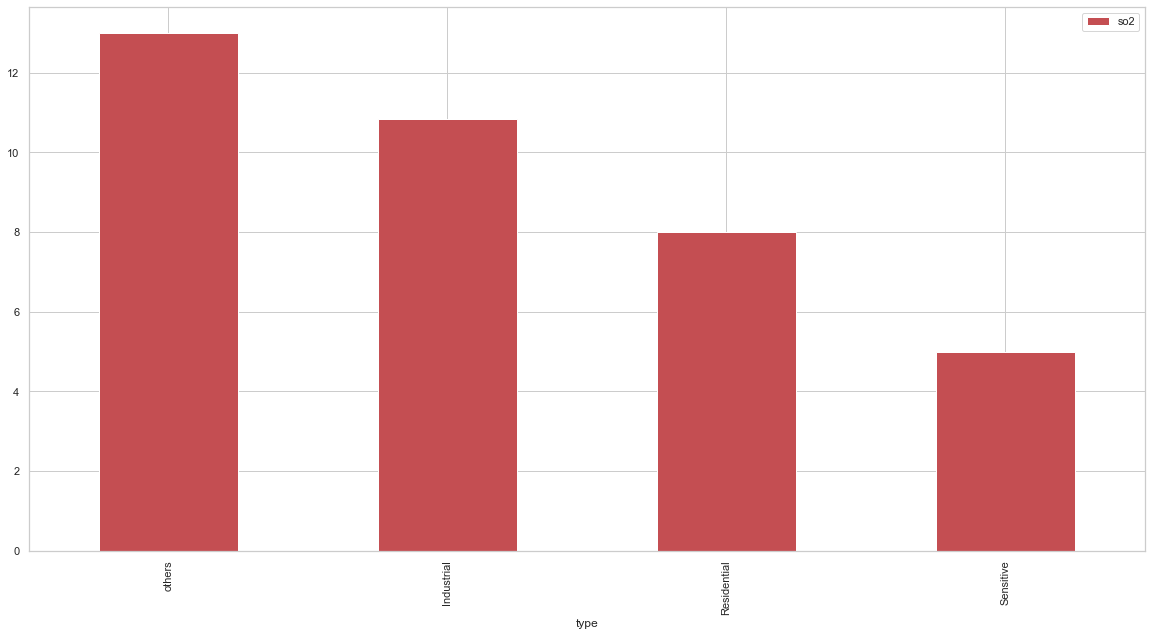

In [70]:
#bar plot for type vs so2

df[['type','so2']].groupby(['type']).median().sort_values('so2', ascending = False).head(25).plot.bar(figsize=(20,10),color='r')

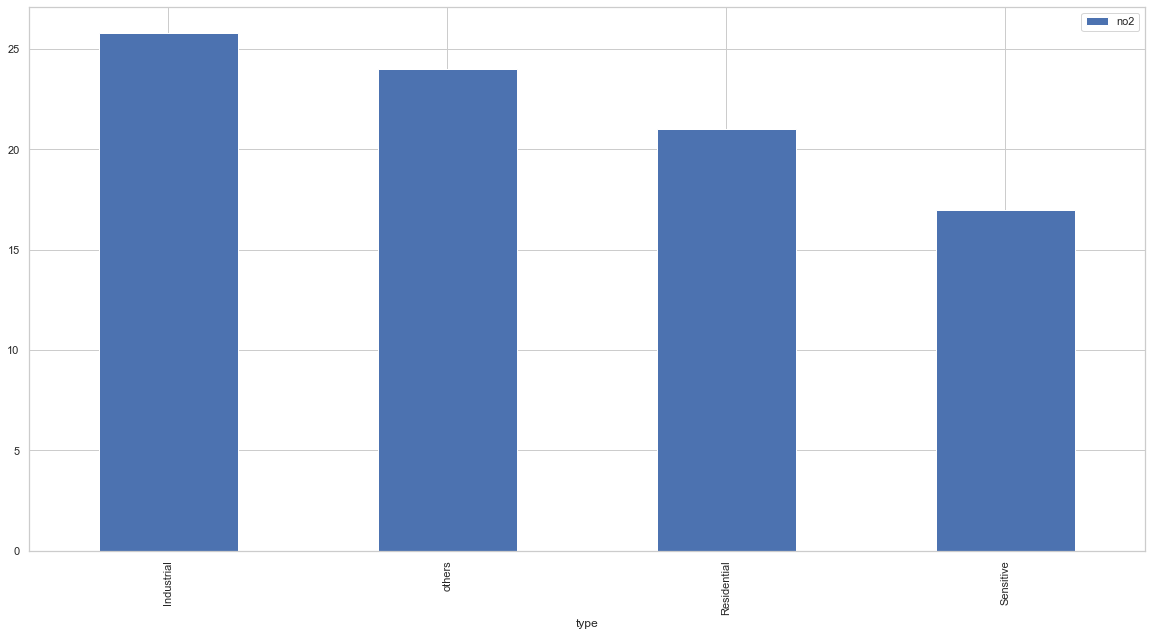

In [71]:
#bar plot for type vs no2

df[['type','no2']].groupby(['type']).median().sort_values('no2', ascending = False).head(25).plot.bar(figsize=(20,10),color='b')

(<matplotlib.axes._subplots.AxesSubplot at 0x2917c5ef5c0>,)

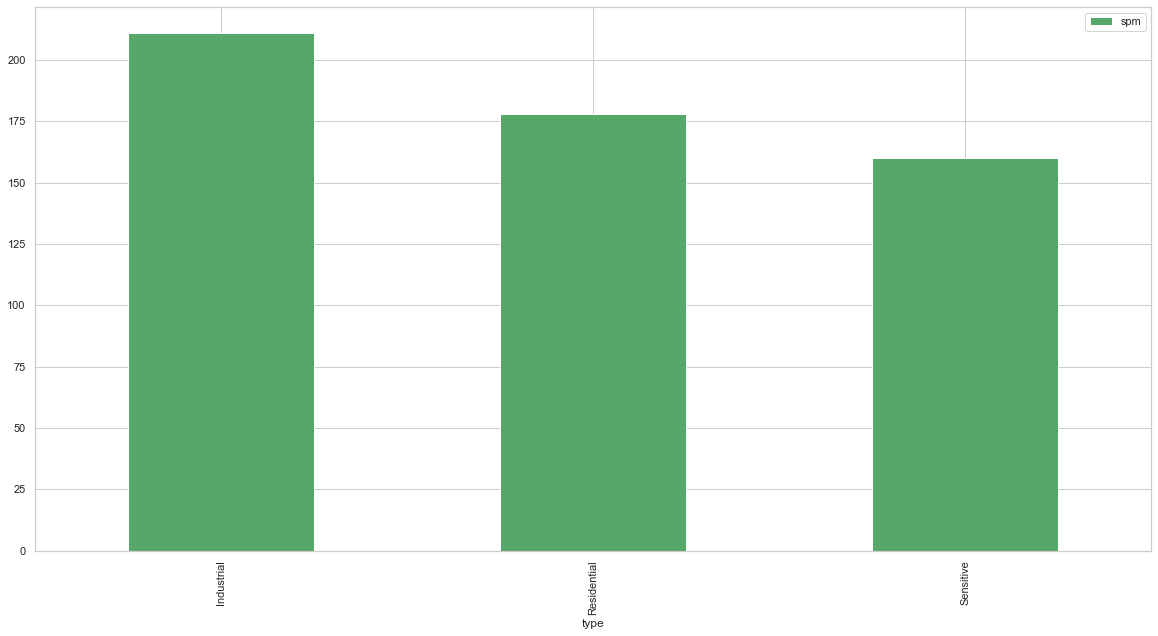

In [72]:
#bar plot for type vs spm

spm_df[['type','spm']].groupby(['type']).median().sort_values('spm', ascending = False).head(25).plot.bar(figsize=(20,10),color='g'),

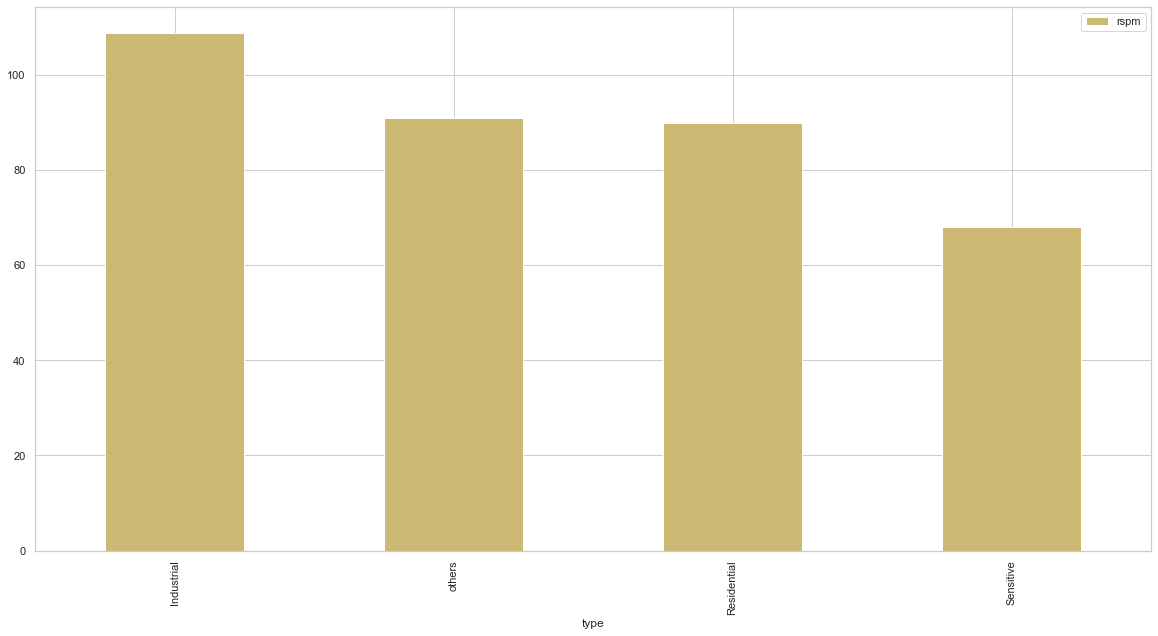

In [73]:
#bar plot for type vs rspm

df[['type','rspm']].groupby(['type']).median().sort_values('rspm', ascending = False).head(25).plot.bar(figsize=(20,10),color='y')

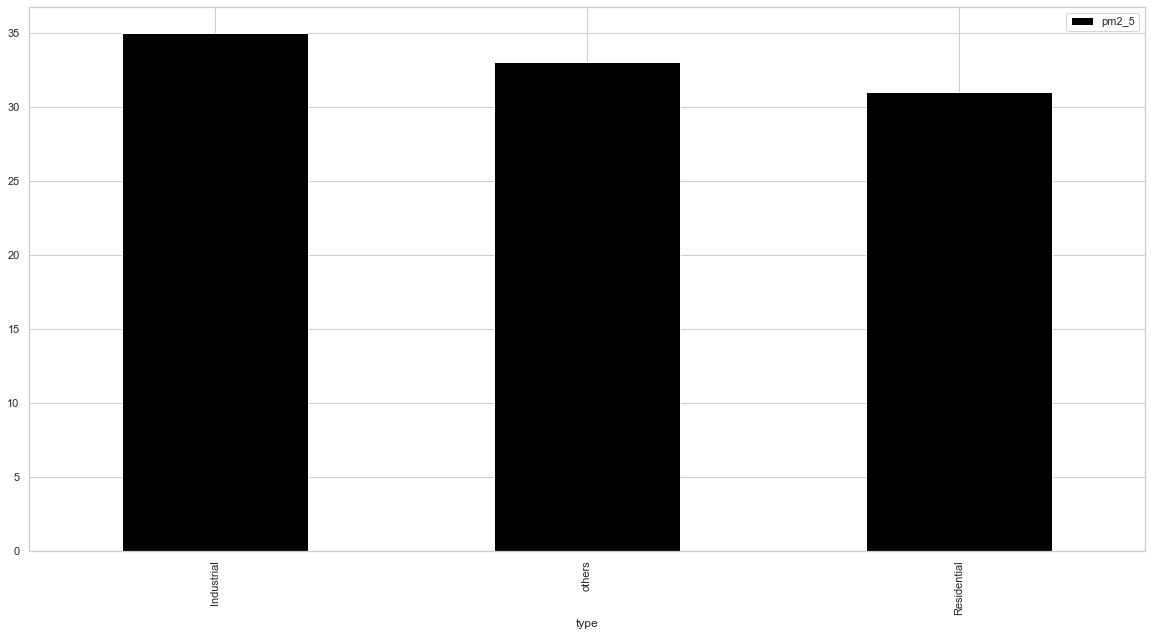

In [74]:
#bar plot for type vs pm2_5

pm2_5_df[['type','pm2_5']].groupby(['type']).median().sort_values('pm2_5', ascending = False).head(25).plot.bar(figsize=(20,10),color='black')

In [75]:
heat_map = df.iloc[:,3:8].corr()

(5.0, 0.0)

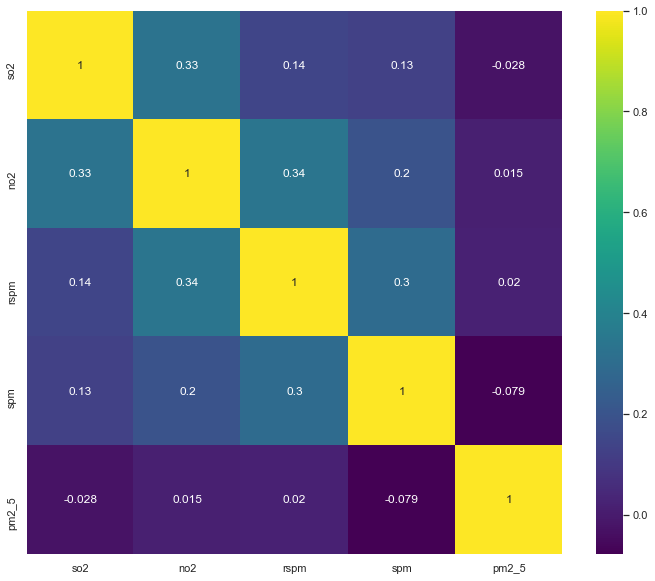

In [76]:
plt.figure(figsize=(12,10))

ax = sns.heatmap(heat_map, annot=True, cmap='viridis') #notation: "annot" not "annote"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

(34.0, 0.0)

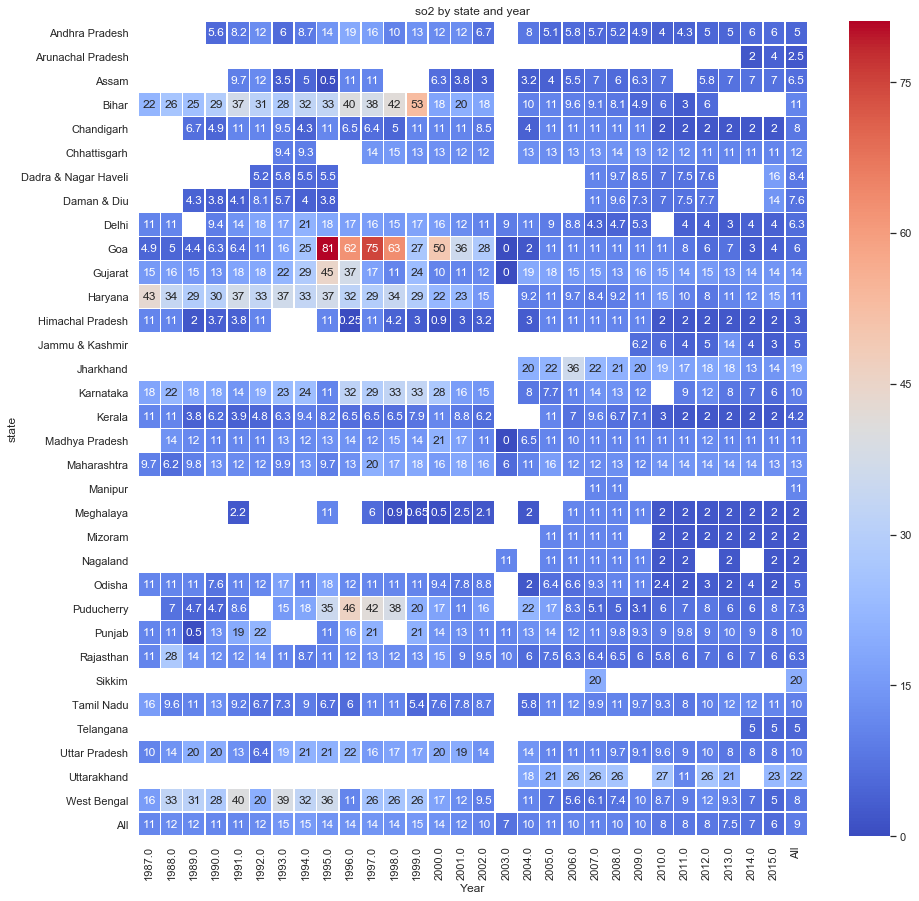

In [77]:
# Heatmap Pivot with State as Row, Year as Col, so2 as Value
f, ax = plt.subplots(figsize = (15,15))

ax.set_title('so2 by state and year')

pivot_so2 = df.pivot_table('so2', index = 'state', columns = ['Year'], aggfunc = 'median', margins=True)

sns.heatmap(pivot_so2, annot = True, cmap = 'coolwarm', linewidths = 0.5)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

(34.0, 0.0)

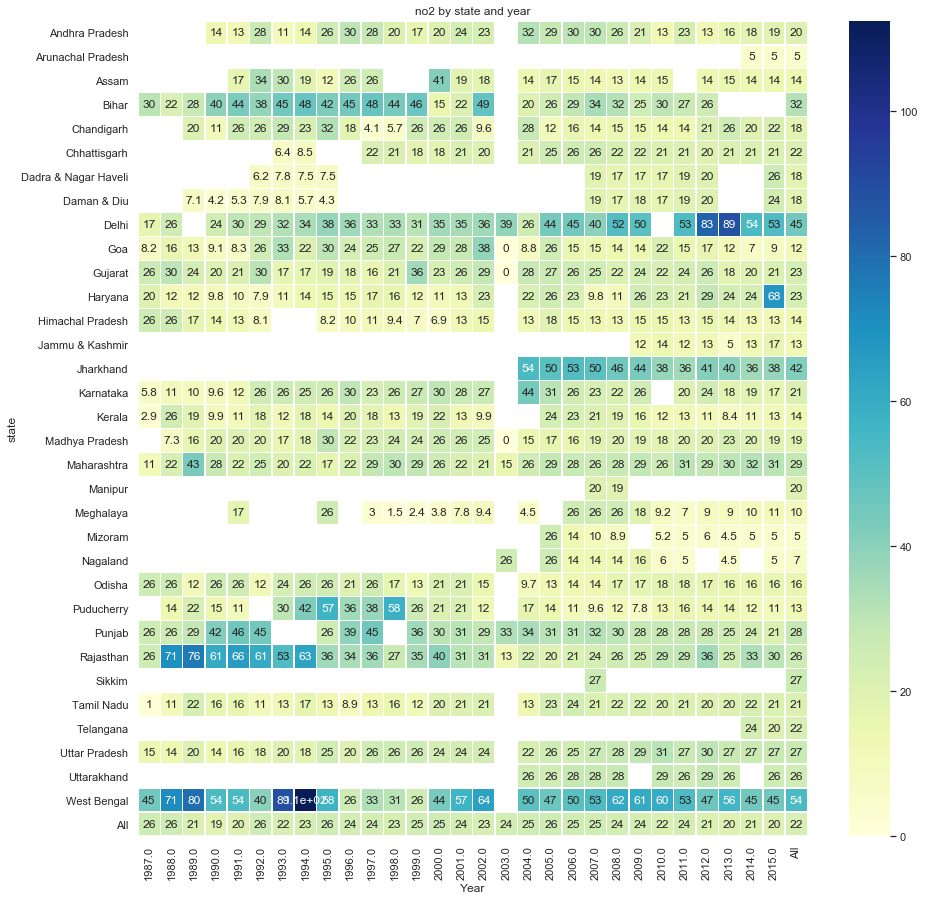

In [78]:
#Heatmap Pivot with State as Row, Year as Col, no2 as Value
f, ax = plt.subplots(figsize = (15,15))

ax.set_title('no2 by state and year')

pivot_no2 = df.pivot_table('no2', index = 'state', columns = ['Year'], aggfunc = 'median', margins=True)

sns.heatmap(pivot_no2,annot = True, cmap = 'YlGnBu', linewidths = 0.5)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [81]:
df['all_p'] = df['so2'] + df['no2'] + df['rspm'] +  df['spm'] + df['pm2_5']

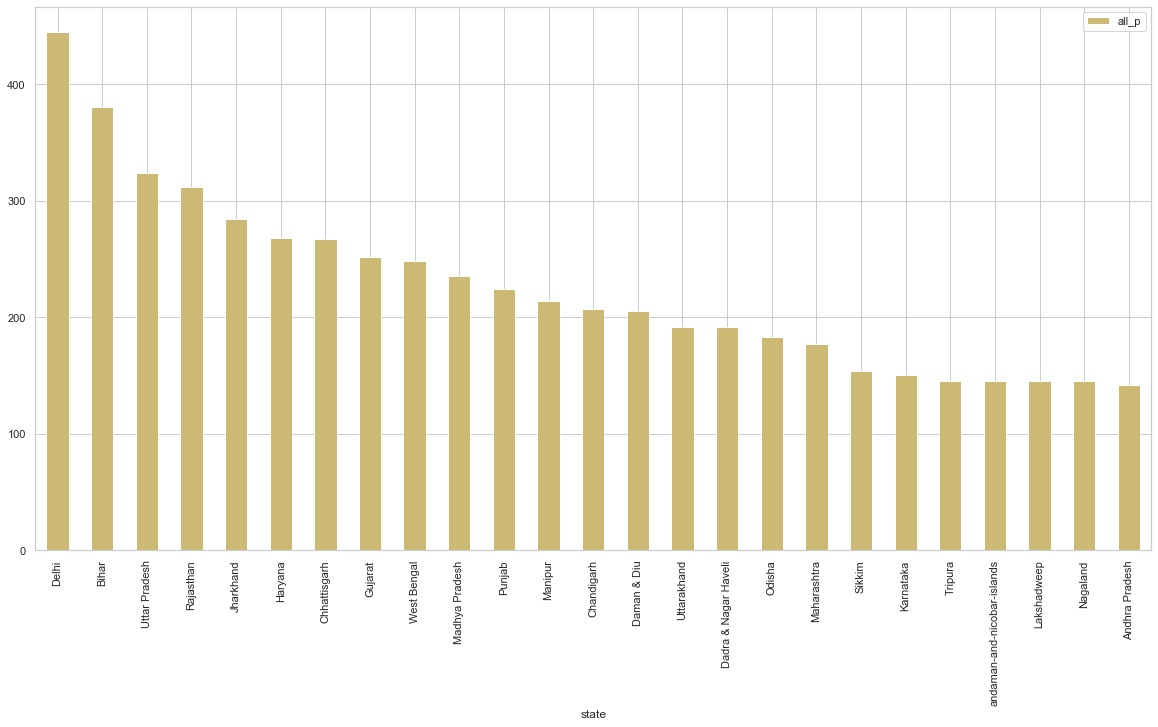

In [83]:
#top states in Danger 

df[['state','all_p']].groupby(['state']).median().sort_values("all_p", ascending = False).head(25).plot.bar(figsize=(20,10),color='y')

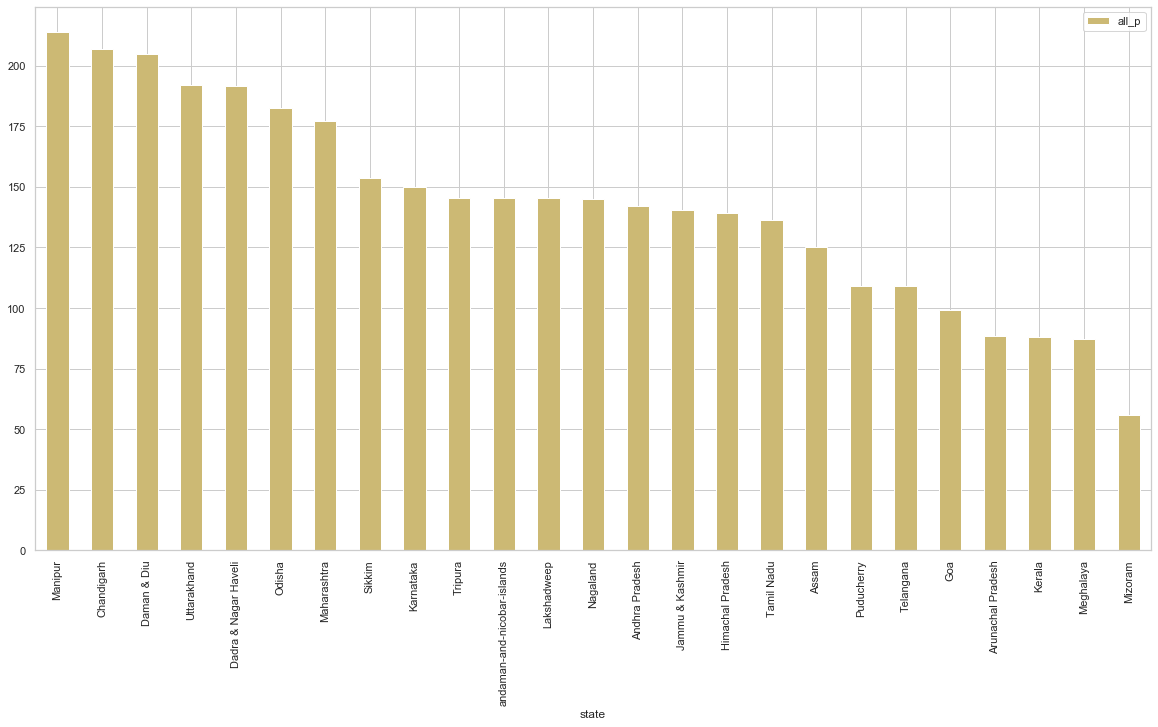

In [84]:
# states in Danger decending order

df[['state','all_p']].groupby(['state']).median().sort_values("all_p", ascending = False).tail(25).plot.bar(figsize=(20,10),color='y')

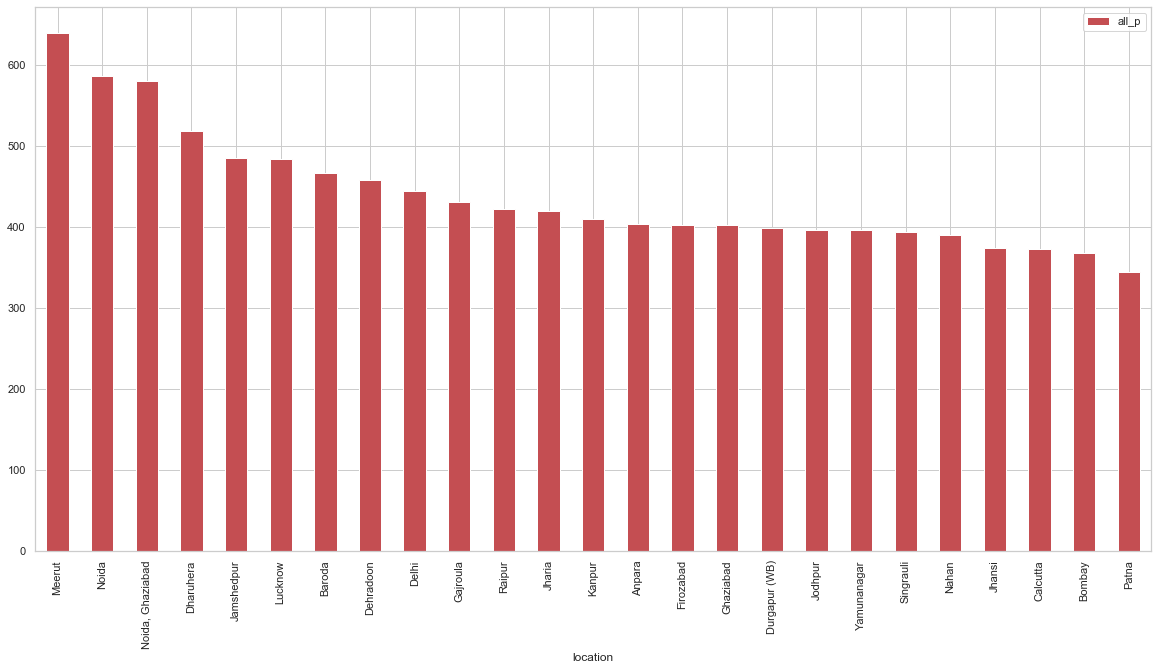

In [85]:
#top cities in Danger 

df[['location','all_p']].groupby(['location']).median().sort_values("all_p", ascending = False).head(25).plot.bar(figsize=(20,10),color= 'r')

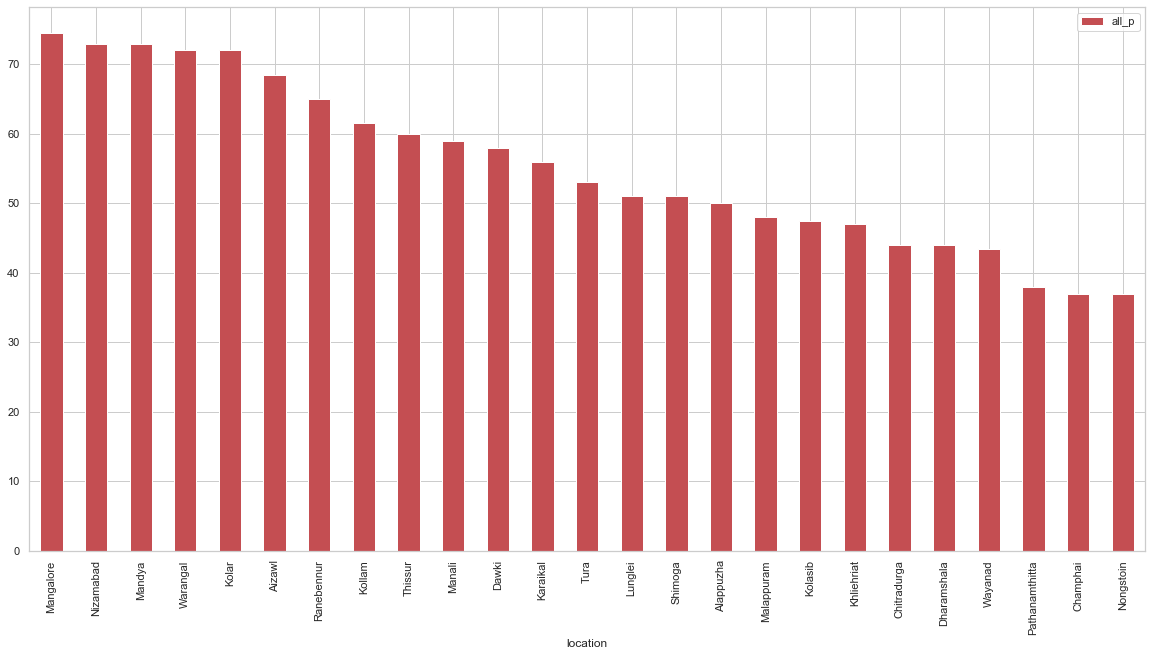

In [86]:
# states in Danger decending order

df[['location','all_p']].groupby(['location']).median().sort_values("all_p", ascending = False).tail(25).plot.bar(figsize=(20,10),color= 'r')

(34.0, 0.0)

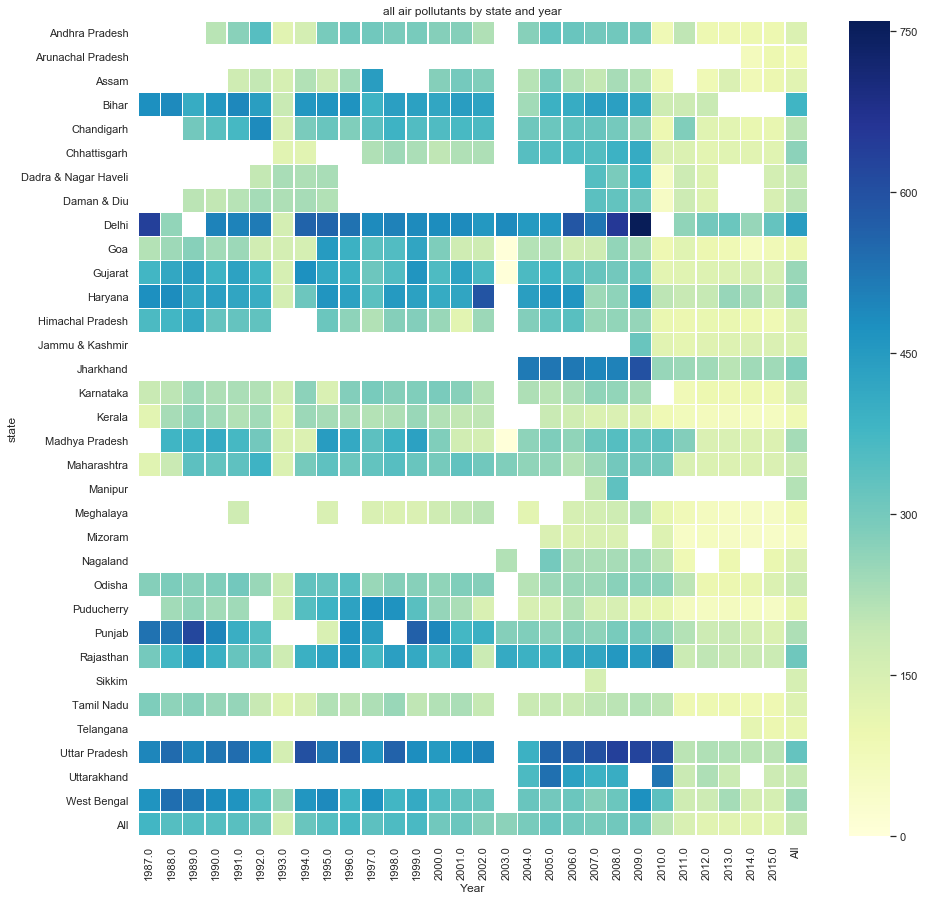

In [87]:
# Heatmap Pivot with State as Row, Year as Col, all as Value
f, ax = plt.subplots(figsize = (15,15))

ax.set_title('all air pollutants by state and year')

pivot_all = df.pivot_table('all_p', index = 'state', columns = ['Year'], aggfunc = 'median', margins=True)

sns.heatmap(pivot_all, annot = False, cmap = 'YlGnBu', linewidths = 0.5)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [ ]:
#Thank you